<a href="https://colab.research.google.com/github/mattderri/LabII/blob/main/SmartAbs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math as m
from scipy.optimize import curve_fit as fit

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def leggi_file(file_in):
  file_out=open('Output.dat','w')
  file_in=open(file_in)

  lines=[]
  for line in file_in:
    lines.append(line)
  for i in range(len(lines)):
    if (lines[i].startswith('==')==False):
      file_out.write("%s\n" %lines[i])

  file_out.close()

  data=pd.read_csv(file_out.name,delim_whitespace=True,header=None)

  return(data)

#Dark Counts


## No Telo

### Dark counts scheda sinistra (presa dati del 21/03)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Zona di lavoro (plateau rate)/Misure 21 03/Dark_counts_scheda_sinistra.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

#I canali 0,1,2,4,5 hanno conteggi totalmente sballati e li ho esclusi dal plot

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.100,+0.010)

for i in range(5,12):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.xlabel('Tensione [V]',fontsize=18)
  plt.legend(loc=2, prop={'size': 16})

plt.show()

#plt.savefig('Scheda_sinistra.pdf')

### Dark counts $V_{th}=3\,mV$ (scheda destra)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Zona di lavoro (plateau rate)/Misure 21 03/dark_counts_Vth3mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

#Ci sono solo i canali 0,1,2,4,5,6,8,9,10==>scheda destra

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

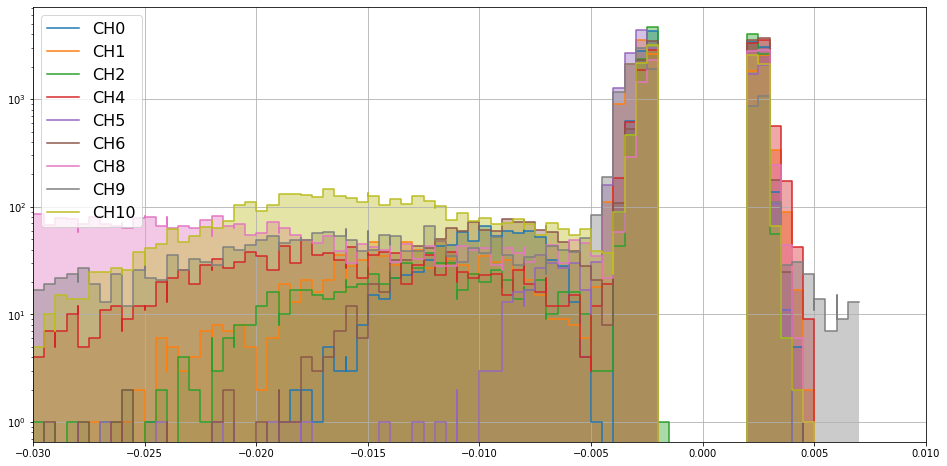

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})

plt.show()

#plt.savefig('Vth3mv.pdf')

### Dark counts $V_{th}=4\,mV$ (scheda destra)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Zona di lavoro (plateau rate)/Misure 21 03/dark_counts_brutti_Vth4mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

#Ci sono solo i canali 0,1,2,4,5,6,8,9,10==>scheda destra

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.050,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})

plt.show()

#plt.savefig('Vth4mv.pdf')

### Dark counts scheda sinistra (presa dati del 24/03)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/Histo_all_sx.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [ ]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.100,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})

plt.show()

## Telo

### Scheda sinistra

#### Treshold a 3 mV

In [13]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_3mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [14]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

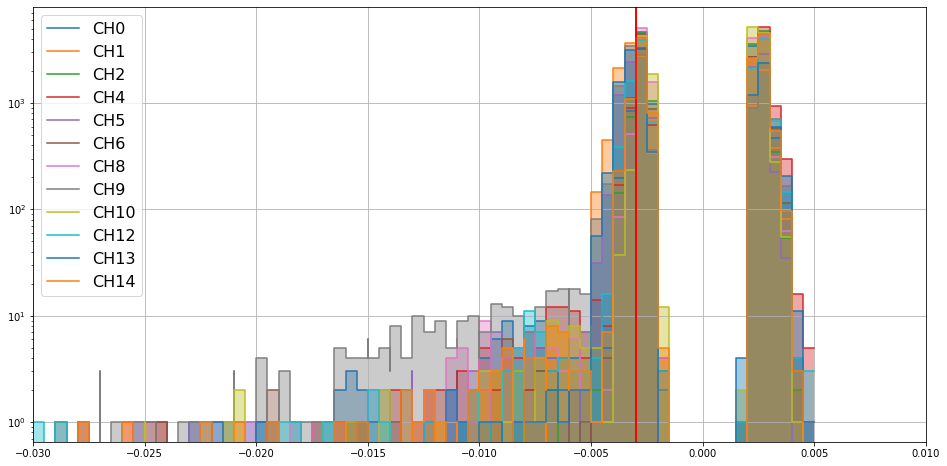

In [15]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.003,color='red')

#plt.show()
plt.savefig("DarkCountsSx_3mV.pdf")

#### Treshold a 6 mV

In [16]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_6mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [17]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

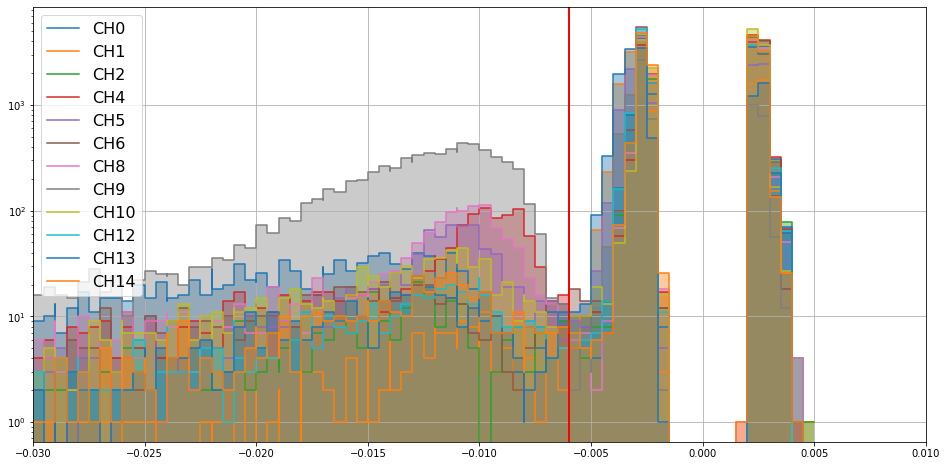

In [18]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.006,color='red')

#plt.show()
plt.savefig("DarkCountsSx_6mV.pdf")

#### Treshold a 9 mV

In [19]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_9mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [20]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

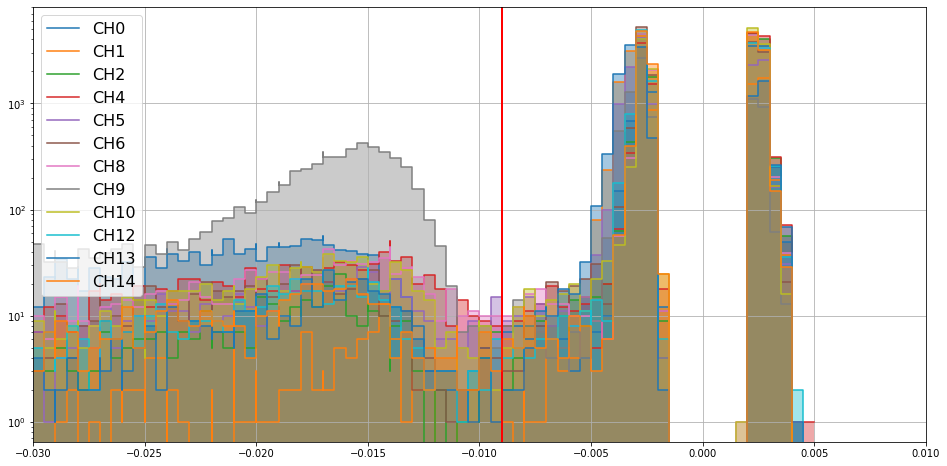

In [21]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.009,color='red')

#plt.show()
plt.savefig("DarkCountsSx_9mV.pdf")

#### Treshold a 12 mV

In [22]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_12mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [23]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

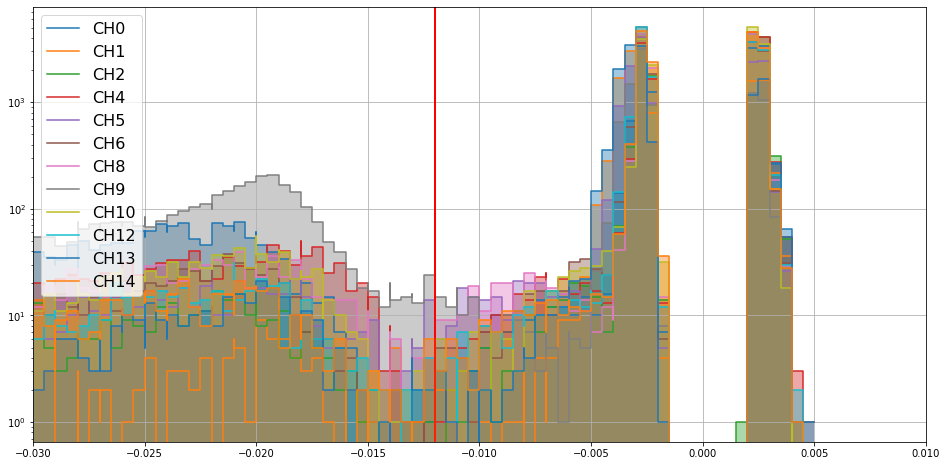

In [24]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.012,color='red')

#plt.show()
plt.savefig("DarkCountsSx_12mV.pdf")

#### Treshold a 15 mV

In [25]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_15mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [26]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

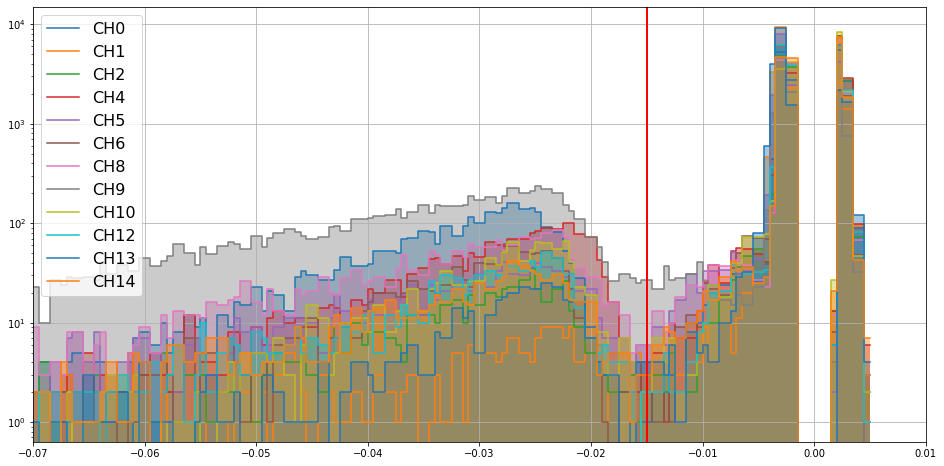

In [27]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.070,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.015,color='red')

#plt.show()
plt.savefig("DarkCountsSx_15mV.pdf")

#### Treshold a 20 mV

In [28]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_20mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [29]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

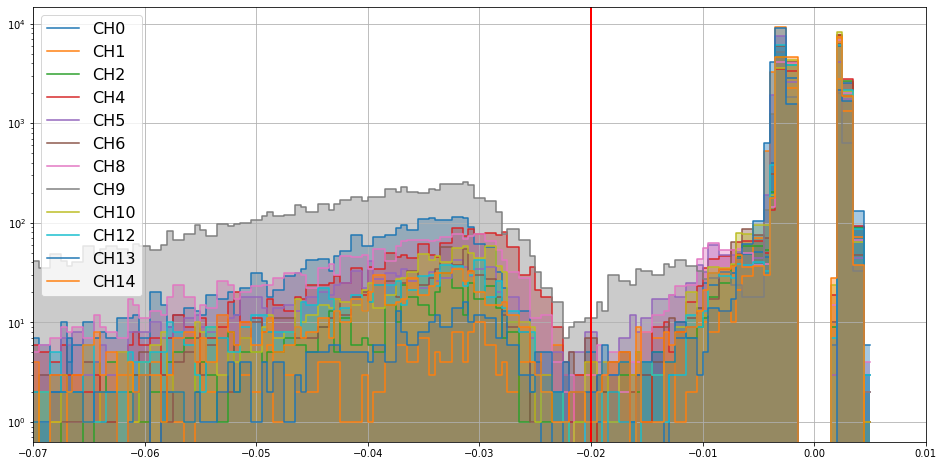

In [30]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.070,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.020,color='red')

#plt.show()
plt.savefig("DarkCountsSx_20mV.pdf")

#### Totale

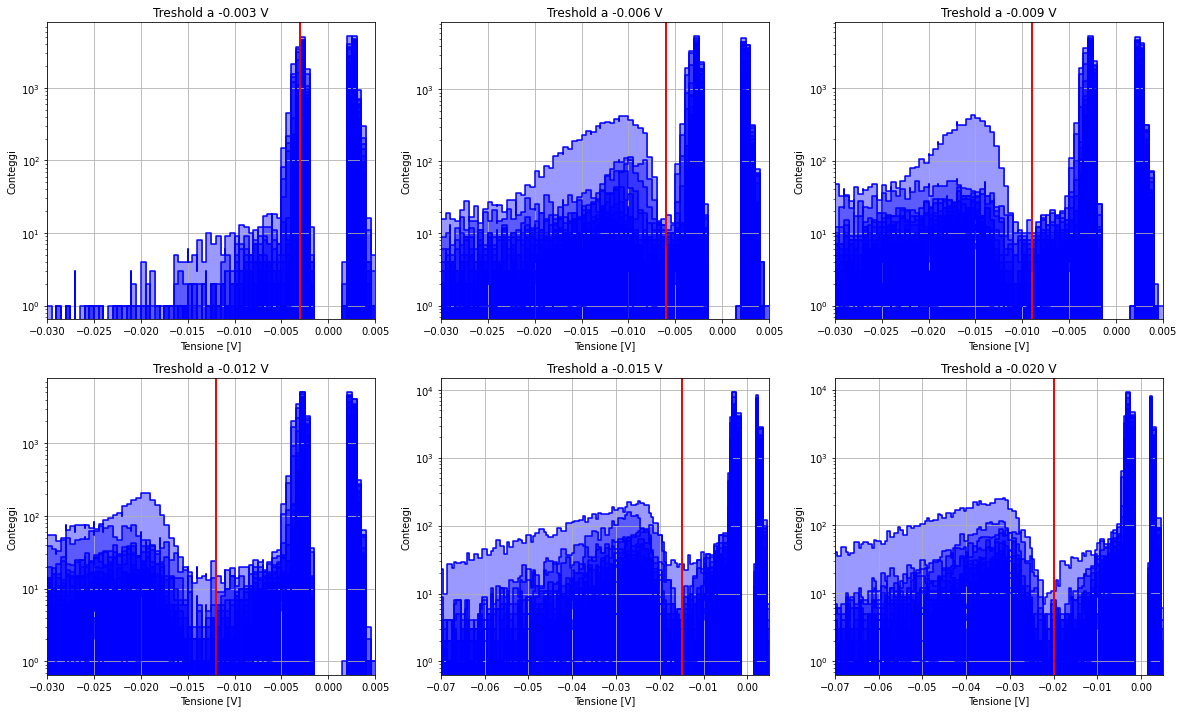

In [31]:
file=["/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_3mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_6mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_9mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_12mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_15mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniSx_20mV.dat"]

treshold=[-0.003,-0.006,-0.009,-0.012,-0.015,-0.020]

column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10','CH12','#12','CH13','#13','CH14','#14']
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10','CH12','CH13','CH14']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10','#12','#13','#14',]

fig,axes=plt.subplots(2,3,sharey=False,figsize=(20,12))

j=0

for i in range(len(file)):
  if(i==3):
    j=1

  data=leggi_file(file[i])
  data=data.transpose()
  data.columns=[column_names[k] for k in range(len(column_names))]

  canali={key:[] for key in canale}
  occ={key:[] for key in occorrenze}

  for l in canale:
    canali[l]=data[l].values
    canali[l]=canali[l].flatten(order='F')

  for m in occorrenze:
    occ[m]=data[m].values
    occ[m]=occ[m].flatten(order='F')

  for n in range(len(canale)):

    if(i<4):
      axes[j,i%3].set_xlim(-0.030,0.005)
    if(i>=4):
      axes[j,i%3].set_xlim(-0.070,0.005)

    axes[j,i%3].fill_between(canali[canale[n]],occ[occorrenze[n]],step="mid",color='blue',alpha=0.4)
    axes[j,i%3].semilogy(canali[canale[n]],occ[occorrenze[n]],drawstyle="steps-mid",color='blue')
    axes[j,i%3].set_xlabel("Tensione [V]")
    axes[j,i%3].set_ylabel("Conteggi")
    axes[j,i%3].axvline(x=treshold[i],color='red')
    axes[j,i%3].set_title("Treshold a {:.3f} V".format(treshold[i]))
    axes[j,i%3].grid(True)
fig.savefig("DarkCountsTotalSx.pdf")

### Scheda destra

#### Treshold a 3 mV

In [32]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_3mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [33]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

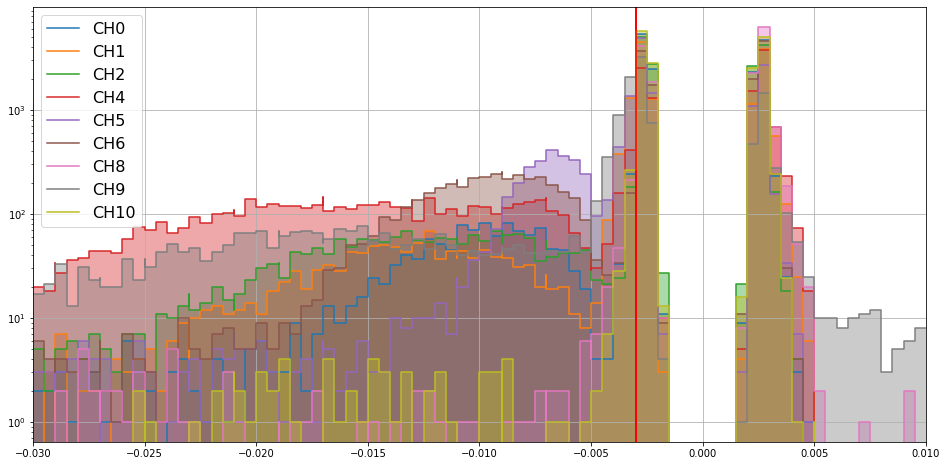

In [34]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.003,color='red')

#plt.show()
plt.savefig("DarkCountsDx_3mV.pdf")

#### Treshold a 6 mV

In [35]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_6mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [36]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

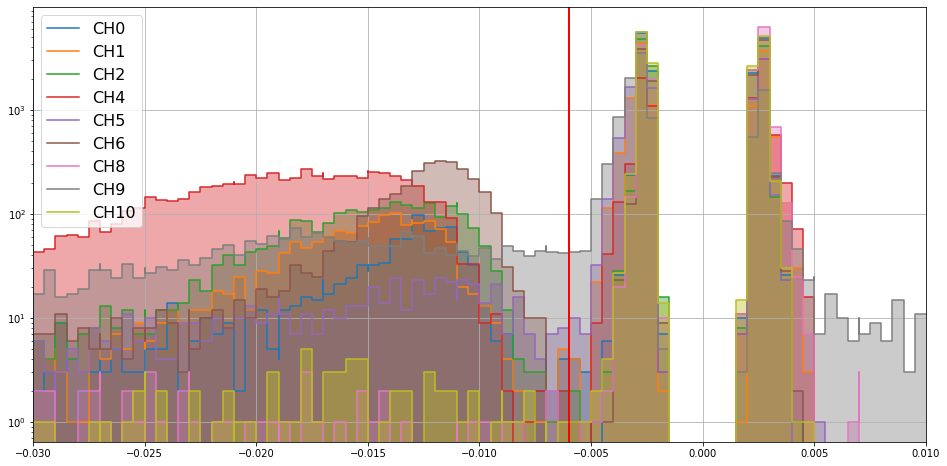

In [37]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.006,color='red')

#plt.show()
plt.savefig("DarkCountsDx_6mV.pdf")

#### Treshold a 9 mV

In [38]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_9mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [39]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

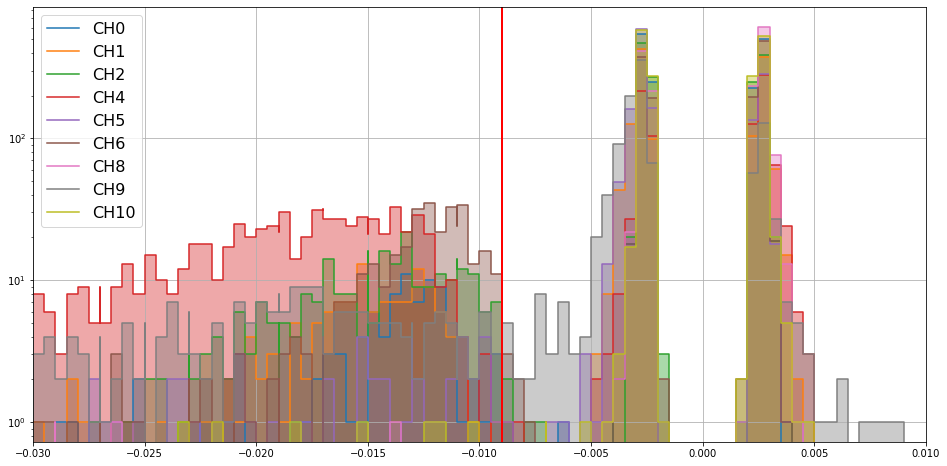

In [40]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.009,color='red')

#plt.show()
plt.savefig("DarkCountsDx_9mV.pdf")

#### Treshold a 12 mV

In [41]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_12mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [42]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

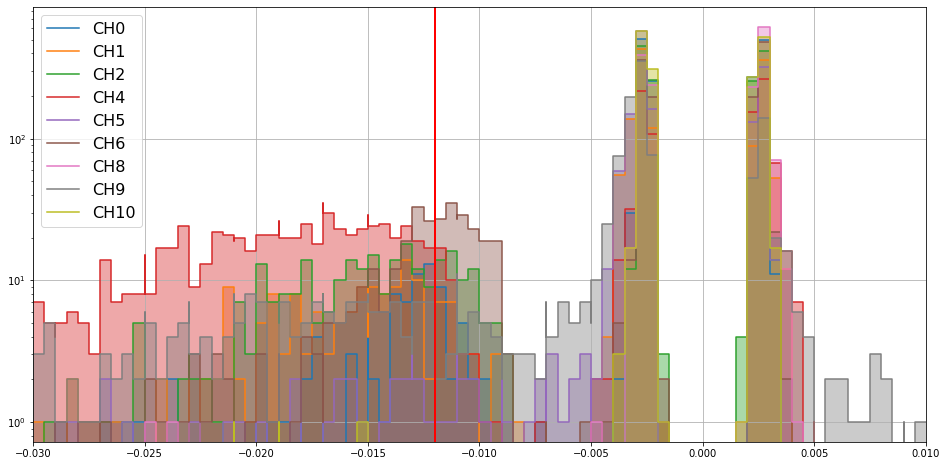

In [43]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.030,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.012,color='red')

#plt.show()
plt.savefig("DarkCountsDx_12mV.pdf")

#### Treshold a 15 mV

In [44]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_15mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [45]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

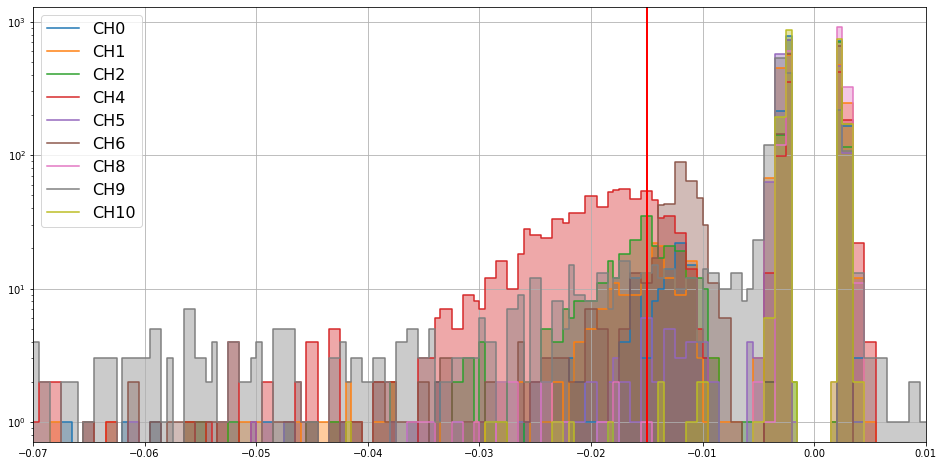

In [46]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.070,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.015,color='red')

#plt.show()
plt.savefig("DarkCountsDx_15mV.pdf")

#### Treshold a 20 mV

In [47]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_20mV.dat")
column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
data=data.transpose()
data.columns=[column_names[i] for i in range(len(column_names))]

In [48]:
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

canali={key:[] for key in canale}
occ={key:[] for key in occorrenze}

for i in canale:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

for j in occorrenze:
  occ[j]=data[j].values
  occ[j]=occ[j].flatten(order='F')

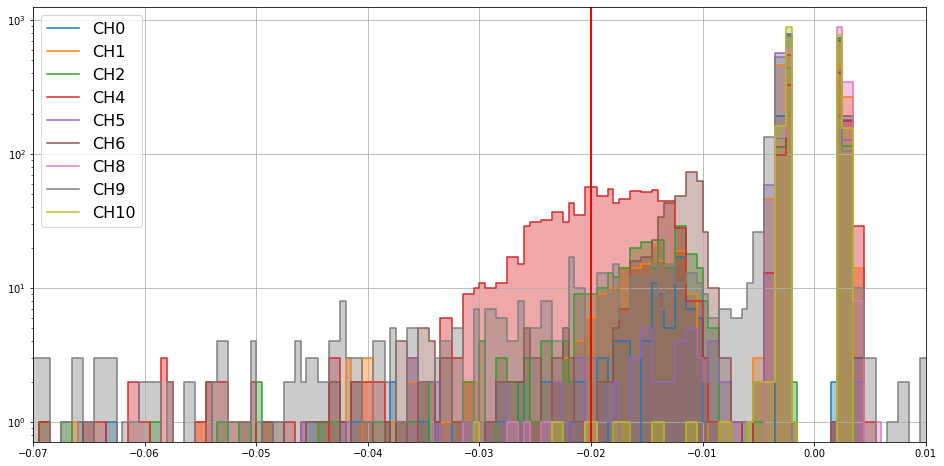

In [49]:
plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(-0.070,+0.010)

for i in range(len(canale)):
  plt.fill_between(canali[canale[i]],occ[occorrenze[i]],step="mid",alpha=0.4)
  plt.semilogy(canali[canale[i]],occ[occorrenze[i]],drawstyle='steps-mid',label=canale[i])
  plt.legend(loc=2,prop={'size':16})
  plt.axvline(x=-0.020,color='red')

#plt.show()
plt.savefig("DarkCountsDx_20mV.pdf")

#### Totale

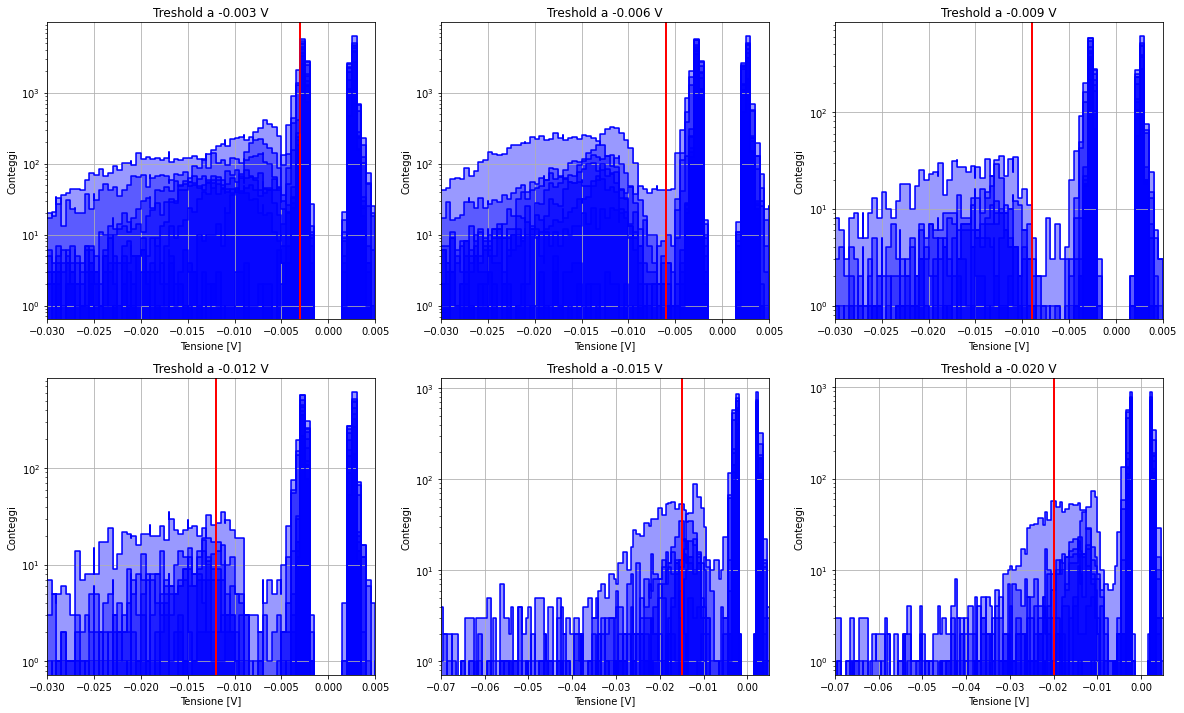

In [50]:
file=["/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_3mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_6mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_9mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_12mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_15mV.dat",
      "/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/DarkCountsBuoniDx_20mV.dat"]

treshold=[-0.003,-0.006,-0.009,-0.012,-0.015,-0.020]

column_names=['CH0','#0','CH1','#1','CH2','#2','CH4','#4','CH5','#5','CH6','#6','CH8','#8','CH9','#9','CH10','#10']
canale=['CH0','CH1','CH2','CH4','CH5','CH6','CH8','CH9','CH10']
occorrenze=['#0','#1','#2','#4','#5','#6','#8','#9','#10']

fig,axes=plt.subplots(2,3,sharey=False,figsize=(20,12))

j=0

for i in range(len(file)):
  if(i==3):
    j=1

  data=leggi_file(file[i])
  data=data.transpose()
  data.columns=[column_names[k] for k in range(len(column_names))]

  canali={key:[] for key in canale}
  occ={key:[] for key in occorrenze}

  for l in canale:
    canali[l]=data[l].values
    canali[l]=canali[l].flatten(order='F')

  for m in occorrenze:
    occ[m]=data[m].values
    occ[m]=occ[m].flatten(order='F')

  for n in range(len(canale)):

    if(i<4):
      axes[j,i%3].set_xlim(-0.030,0.005)
    if(i>=4):
      axes[j,i%3].set_xlim(-0.070,0.005)

    axes[j,i%3].fill_between(canali[canale[n]],occ[occorrenze[n]],step="mid",color='blue',alpha=0.4)
    axes[j,i%3].semilogy(canali[canale[n]],occ[occorrenze[n]],drawstyle="steps-mid",color='blue')
    axes[j,i%3].set_xlabel("Tensione [V]")
    axes[j,i%3].set_ylabel("Conteggi")
    axes[j,i%3].axvline(x=treshold[i],color='red')
    axes[j,i%3].set_title("Treshold a {:.3f} V".format(treshold[i]))
    axes[j,i%3].grid(True)
fig.savefig("DarkCountsTotalDx.pdf")

# Coincidenze (quasi sicuramente da scartare)

Inizio presa dati: 17h.33m.26s.532ms

Fine presa dati: 17h.34m.7s.224ms

$\Delta t=$ 40s.692ms

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/coincidenze_offline.dat")
labels=['CH0','CH1','CH2','CH3','CH4','CH5','CH6','CH7','CH8','CH9','CH10','CH11','CH12','CH13','CH14','CH15']
data=data.transpose()
data.columns=[labels[i%16] for i in range(0,16000)]

In [ ]:
canali={key:[] for key in labels}

for i in labels:
  canali[i]=data[i].values
  canali[i]=canali[i].flatten(order='F')

In [ ]:
th=-0.005 #threshold impostata per la presa dati
t=40.692 #finestra temporale di presa dati
eff=0
err=0

for j in range(0,len(labels),4):
  h=0
  k=0
  for i in range(len(canali['CH0'])):

    if(canali[labels[j]][i]<th and canali[labels[j+1]][i]<th):
      h=h+1
    if(canali[labels[j]][i]<th and canali[labels[j+1]][i]<th and canali[labels[j+2]][i]<th):
      k=k+1
  eff = k/h
  err = eff*m.sqrt(eff*(1-eff)/h)
  print('Rate di coincidenze tra',labels[j],'e',labels[j+1],':\t\t%.3f'%(h/t),'Hz [',h,'eventi]')
  print('Rate di coincidenze tra',labels[j],',',labels[j+1],'e',labels[j+2],':\t%.3f'%(k/t),'Hz [',k,'eventi]')
  print('Efficienza canale', labels[j+2],':\t%.3f'%(eff), ' +/- %.3f'%(err))
  print('')

# Rate


##Scheda sinistra

### Analisi della prima presa dati "Rates.dat" - 101 punti

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/Rates.dat")
labels=['0-1-2','0-1','1-2','0-2','4-5-6','4-5','5-6','4-6','8-9-10','8-9','9-10','8-10','12-13-14','12-13','13-14','12-14']
data.columns=[labels[i] for i in range(len(labels))]

In [ ]:
mean_rates = np.mean(data[labels])
max_rates = np.amax(data, axis=0)
min_rates = np.amin(data, axis=0)
err_rates = np.sqrt(mean_rates)
for i in range(len(labels)):
  print("Rate di coincidenze canali {} :\t\t{:.3f} +/- {:.3f} Hz".format(labels[i], mean_rates[labels[i]], err_rates[labels[i]]))

Rate di coincidenze canali 0-1-2 :		0.795 +/- 0.892 Hz
Rate di coincidenze canali 0-1 :		1.295 +/- 1.138 Hz
Rate di coincidenze canali 1-2 :		1.135 +/- 1.066 Hz
Rate di coincidenze canali 0-2 :		1.116 +/- 1.056 Hz
Rate di coincidenze canali 4-5-6 :		1.095 +/- 1.046 Hz
Rate di coincidenze canali 4-5 :		3.833 +/- 1.958 Hz
Rate di coincidenze canali 5-6 :		2.382 +/- 1.543 Hz
Rate di coincidenze canali 4-6 :		1.523 +/- 1.234 Hz
Rate di coincidenze canali 8-9-10 :		0.000 +/- 0.000 Hz
Rate di coincidenze canali 8-9 :		0.000 +/- 0.000 Hz
Rate di coincidenze canali 9-10 :		0.000 +/- 0.000 Hz
Rate di coincidenze canali 8-10 :		1.550 +/- 1.245 Hz
Rate di coincidenze canali 12-13-14 :		1.204 +/- 1.097 Hz
Rate di coincidenze canali 12-13 :		1.752 +/- 1.324 Hz
Rate di coincidenze canali 13-14 :		1.866 +/- 1.366 Hz
Rate di coincidenze canali 12-14 :		1.740 +/- 1.319 Hz


In [ ]:
triplet_counter = 1
PMT_number = ['14', '13', '1', '3', '2', '15', '17', '16', '4', '6', '5', '18']
PMT_label = ['low', 'high', 'middle']
print("----------------------------------SCHEDA SINISTRA------------------------------------")
for i in range(0, 4):
    print("----TRIPLETTA N°{}-----".format(triplet_counter))
    for j in range(1, 4):
        eff = mean_rates[labels[4*i]]/mean_rates[labels[4*i+j]]
        err = np.sqrt((mean_rates[4*i]*err_rates[4*i+j]/mean_rates[4*i+j]**2)**2 + (err_rates[4*i]**2/mean_rates[4*i+j])**2)
        print("\teff. detector {} ({})= {:.3f} +/- {:.3f}".format(PMT_number[3*i+j-1], PMT_label[j-1], eff, err))
    triplet_counter = triplet_counter + 1
    print("\n")

----------------------------------SCHEDA SINISTRA------------------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.614 +/- 0.817
	eff. detector 13 (high)= 0.700 +/- 0.960
	eff. detector 1 (middle)= 0.712 +/- 0.981


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.286 +/- 0.321
	eff. detector 2 (high)= 0.460 +/- 0.548
	eff. detector 15 (middle)= 0.719 +/- 0.925


----TRIPLETTA N°3-----
	eff. detector 17 (low)= nan +/- nan
	eff. detector 16 (high)= nan +/- nan
	eff. detector 4 (middle)= 0.000 +/- 0.000


----TRIPLETTA N°4-----
	eff. detector 6 (low)= 0.687 +/- 0.861
	eff. detector 5 (high)= 0.646 +/- 0.800
	eff. detector 18 (middle)= 0.692 +/- 0.869




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Presa dati con tripletta 8-9-10 non funzionante!!!!

### Analisi seconda presa dati completa "Rates_4.dat" - 600 punti, intervallo 1s, PMTs su scheda sinistra

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/rates_4.dat")
labels=['0-1-2','0-1','1-2','0-2','4-5-6','4-5','5-6','4-6','8-9-10','8-9','9-10','8-10','12-13-14','12-13','13-14','12-14']
data.columns=[labels[i] for i in range(len(labels))]

Valutazione delle medie aritmetiche da campione di rate

In [ ]:
from scipy.stats import describe
rate_stats=[describe(data[labels[i]]) for i in range(len(labels))]
rate_mean = [(rate_stats[i][2]/np.sqrt(rate_stats[i][3]))**2 for i in range(len(labels))]
rate_std = [np.sqrt(rate_stats[i][3]/data[labels[i]].size) for i in range(len(labels))]
for i in range(len(labels)):
  print("Rate di coincidenze canali {} :\t{:.3f} +/- {:.3f} Hz".format(labels[i], rate_mean[i], rate_std[i]))


Rate di coincidenze canali 0-1-2 :	0.896 +/- 0.040 Hz
Rate di coincidenze canali 0-1 :	1.339 +/- 0.054 Hz
Rate di coincidenze canali 1-2 :	1.175 +/- 0.046 Hz
Rate di coincidenze canali 0-2 :	1.025 +/- 0.049 Hz
Rate di coincidenze canali 4-5-6 :	0.985 +/- 0.043 Hz
Rate di coincidenze canali 4-5 :	3.087 +/- 0.082 Hz
Rate di coincidenze canali 5-6 :	1.896 +/- 0.062 Hz
Rate di coincidenze canali 4-6 :	1.200 +/- 0.056 Hz
Rate di coincidenze canali 8-9-10 :	1.101 +/- 0.048 Hz
Rate di coincidenze canali 8-9 :	4.822 +/- 0.109 Hz
Rate di coincidenze canali 9-10 :	2.896 +/- 0.079 Hz
Rate di coincidenze canali 8-10 :	1.190 +/- 0.058 Hz
Rate di coincidenze canali 12-13-14 :	0.934 +/- 0.040 Hz
Rate di coincidenze canali 12-13 :	1.436 +/- 0.052 Hz
Rate di coincidenze canali 13-14 :	1.623 +/- 0.054 Hz
Rate di coincidenze canali 12-14 :	1.061 +/- 0.057 Hz


Valutazione delle medie tramite fit con scipy sulla distribuzione dei rate

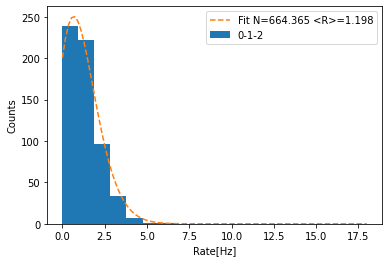

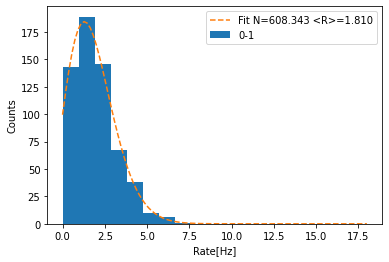

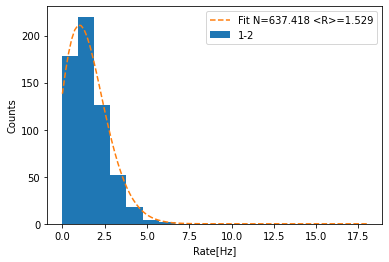

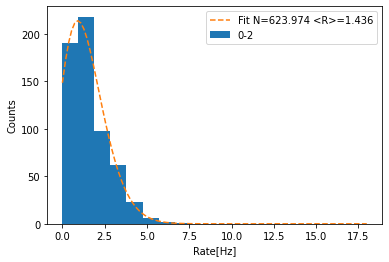

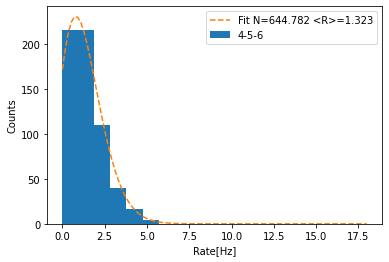

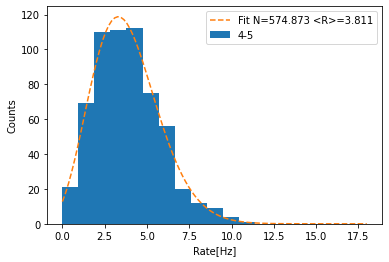

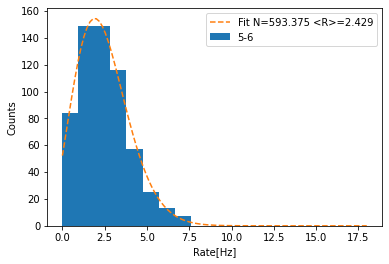

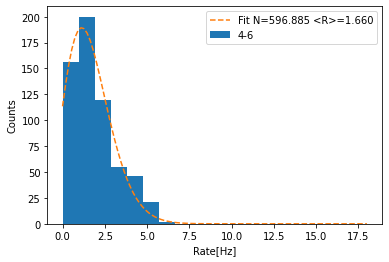

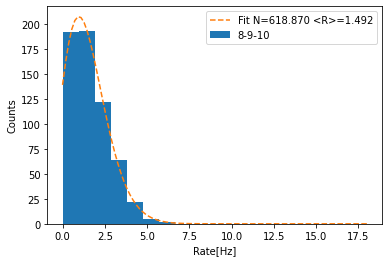

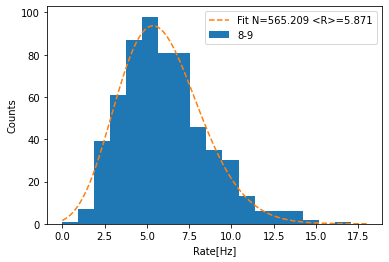

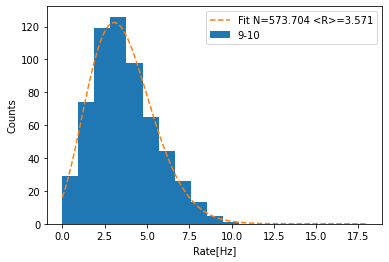

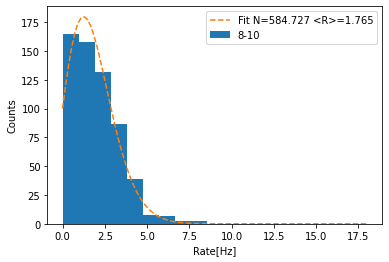

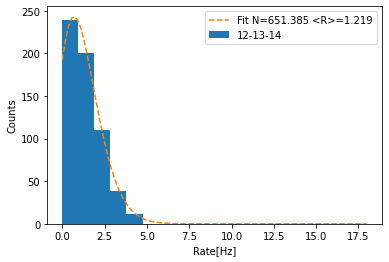

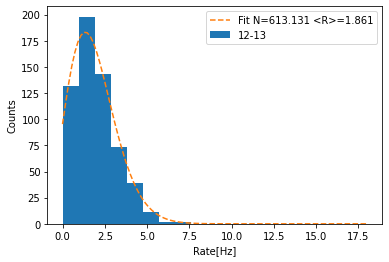

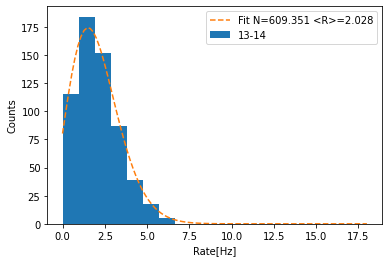

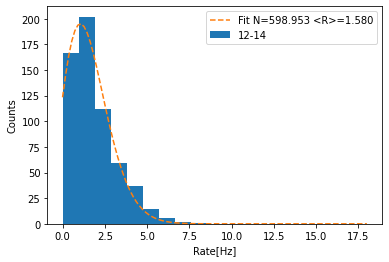

In [ ]:
from scipy.special import factorial

def Poisson(x,N,alpha):
  return np.array(N*alpha**x*m.exp(-alpha)/factorial(x))

mean_rates = np.mean(data[labels])
x = np.linspace(0,18, 100)
max_rates = np.amax(data, axis=0)
min_rates = np.amin(data, axis=0)
err_rates = []
new_mean_rates = []
for i in range(0,len(labels)):
  binned_rates, bins, _ = plt.hist(data[labels[i]], bins=19, range=(0, 18), label=labels[i])
  centered_bins = np.array([ (bins[p]+bins[p+1])/2  for p in range(0, bins.size-1)])
  plt.xlabel('Rate[Hz]')
  plt.ylabel('Counts')
  fit_pars, cov_matrix = fit(Poisson, centered_bins, binned_rates, p0=[data[labels[i]].size, mean_rates[labels[i]]])
  plt.plot(x, Poisson(x, fit_pars[0], fit_pars[1]), '--', label="Fit N={:.3f} <R>={:.3f}".format(fit_pars[0], fit_pars[1]))
  plt.legend()
  plt.show()
  plt.close()
  new_mean_rates.append(fit_pars[1])
  err_rates.append(np.sqrt(fit_pars[1]/data[labels[i]].size))

In [ ]:
for i in range(len(labels)):
  print("Rate di coincidenze canali {} :\t{:.3f} +/- {:.3f} Hz".format(labels[i], mean_rates[labels[i]], err_rates[i]))

Rate di coincidenze canali 0-1-2 :	0.917 +/- 0.045 Hz
Rate di coincidenze canali 0-1 :	1.531 +/- 0.055 Hz
Rate di coincidenze canali 1-2 :	1.208 +/- 0.050 Hz
Rate di coincidenze canali 0-2 :	1.223 +/- 0.049 Hz
Rate di coincidenze canali 4-5-6 :	1.054 +/- 0.047 Hz
Rate di coincidenze canali 4-5 :	3.540 +/- 0.080 Hz
Rate di coincidenze canali 5-6 :	2.096 +/- 0.064 Hz
Rate di coincidenze canali 4-6 :	1.490 +/- 0.053 Hz
Rate di coincidenze canali 8-9-10 :	1.236 +/- 0.050 Hz
Rate di coincidenze canali 8-9 :	5.850 +/- 0.099 Hz
Rate di coincidenze canali 9-10 :	3.294 +/- 0.077 Hz
Rate di coincidenze canali 8-10 :	1.557 +/- 0.054 Hz
Rate di coincidenze canali 12-13-14 :	0.951 +/- 0.045 Hz
Rate di coincidenze canali 12-13 :	1.536 +/- 0.056 Hz
Rate di coincidenze canali 13-14 :	1.673 +/- 0.058 Hz
Rate di coincidenze canali 12-14 :	1.435 +/- 0.051 Hz


In [ ]:
triplet_counter = 1
PMT_number = ['14', '13', '1', '3', '2', '15', '17', '16', '4', '6', '5', '18']
PMT_label = ['low', 'high', 'middle']
print("----------------------------------SCHEDA SINISTRA------------------------------------")
print("-----------------------------V=900 V, Threshold=-3 mV--------------------------------")
for i in range(0, 4):
    print("----TRIPLETTA N°{}-----".format(triplet_counter))
    for j in range(1, 4):
        eff_stat = rate_mean[4*i]/rate_mean[4*i+j]
        err_stat = np.sqrt((rate_mean[4*i]*rate_std[4*i+j]/rate_mean[4*i+j]**2)**2 + (rate_std[4*i]**2/rate_mean[4*i+j])**2)
        eff = mean_rates[labels[4*i]]/mean_rates[labels[4*i+j]]
        err = np.sqrt((mean_rates[labels[4*i]]*err_rates[4*i+j]/mean_rates[labels[4*i+j]]**2)**2 + (err_rates[4*i]**2/mean_rates[labels[4*i+j]])**2)
        comp = np.absolute(eff_stat - eff)/np.sqrt(err**2+err_stat**2)
        print("\teff. detector {} ({})= {:.3f} +/- {:.3f} (stat)    {:.3f} +/- {:.3f} (fit)       Compatibilità: {:.3f}sigma".format(PMT_number[3*i+j-1], PMT_label[j-1], eff_stat, err_stat, eff, err, comp))
    triplet_counter = triplet_counter + 1
    print("\n")

----------------------------------SCHEDA SINISTRA------------------------------------
-----------------------------V=900 V, Threshold=-3 mV--------------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.669 +/- 0.027 (stat)    0.599 +/- 0.022 (fit)       Compatibilità: 2.043sigma
	eff. detector 13 (high)= 0.763 +/- 0.030 (stat)    0.759 +/- 0.032 (fit)       Compatibilità: 0.090sigma
	eff. detector 1 (middle)= 0.874 +/- 0.042 (stat)    0.750 +/- 0.030 (fit)       Compatibilità: 2.415sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.319 +/- 0.009 (stat)    0.298 +/- 0.007 (fit)       Compatibilità: 1.990sigma
	eff. detector 2 (high)= 0.520 +/- 0.017 (stat)    0.503 +/- 0.015 (fit)       Compatibilità: 0.747sigma
	eff. detector 15 (middle)= 0.821 +/- 0.038 (stat)    0.707 +/- 0.025 (fit)       Compatibilità: 2.509sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.228 +/- 0.005 (stat)    0.211 +/- 0.004 (fit)       Compatibilità: 2.693sigma
	eff. detector 

###Analisi presa dati scheda sinistra (presa dati 31/03)

In [ ]:
from scipy.stats import describe
from scipy.special import factorial

def Poisson(x,N,alpha):
  return np.array(N*alpha**x*m.exp(-alpha)/factorial(x))

def Gaussian(x,N,mu,sig):
  return np.array(N*np.exp(-(x-mu)**2/(2*sig**2))/np.sqrt(2*m.pi*sig**2))

def analysis_rate(file_in, Vth, dt):
  data = leggi_file(file_in)
  labels=['0-1-2','0-1','1-2','0-2','4-5-6','4-5','5-6','4-6','8-9-10','8-9','9-10','8-10','12-13-14','12-13','13-14','12-14']
  data.columns=[labels[i] for i in range(len(labels))]

  rate_stats=[describe(data[labels[i]]) for i in range(len(labels))]
  rate_mean = [(rate_stats[i][2]/np.sqrt(rate_stats[i][3]))**2 for i in range(len(labels))]
  rate_std = [np.sqrt(rate_stats[i][3]/data[labels[i]].size) for i in range(len(labels))]


  mean_rates = np.mean(data[labels])
  x = np.linspace(0,18, 100)
  err_rates = []
  new_mean_rates = []
  k=0

  fig,axes=plt.subplots(4,4,sharey=False,figsize=(20,16))
  for i in range(0,4):
    for j in range(0,4):
      if dt > 9:
        x_max_=15
        bins_=23
      else:
        x_max_=18
        bins_=19
      binned_rates, bins, _ = axes[i,j].hist(data[labels[j+k]], bins=bins_, range=(0,x_max_), label=labels[j+k])
      axes[i,j].set_xlabel('Rate[Hz]')
      axes[i,j].set_ylabel('Counts')
      axes[i,j].grid()

      centered_bins = np.array([(bins[p]+bins[p+1])/2  for p in range(0, bins.size-1)])
      if dt < 9:
        fit_pars, cov_matrix = fit(Poisson, centered_bins, binned_rates, p0=[data[labels[j+k]].size, mean_rates[labels[j+k]]])
        axes[i,j].plot(x, Poisson(x, fit_pars[0], fit_pars[1]), '--', label="Fit N={:.3f} <R>={:.3f}".format(fit_pars[0], fit_pars[1]))
      else:
        fit_pars, cov_matrix = fit(Gaussian, centered_bins, binned_rates, p0=[data[labels[j+k]].size, mean_rates[labels[j+k]], rate_std[j+k]*np.sqrt(data[labels[j+k]].size)])
        axes[i,j].plot(x, Gaussian(x, fit_pars[0], fit_pars[1], fit_pars[2]), '--', label="Fit N={:d} <R>={:.3f} sigma={:.3f}".format(int(fit_pars[0]), fit_pars[1], fit_pars[2]))
      axes[i,j].legend(loc='upper right')

      new_mean_rates.append(fit_pars[1])
      err_rates.append(np.sqrt(fit_pars[1]/data[labels[i]].size))

    k=k+4

  plt.show()
  plt.close()
  print("\n\n\n")

  triplet_counter = 1
  PMT_number = ['14', '13', '1', '3', '2', '15', '17', '16', '4', '6', '5', '18']
  PMT_label = ['low', 'high', 'middle']
  print("----------------------------------SCHEDA SINISTRA------------------------------------")
  print("-------------------------V=900 V, Threshold=-{:d} mV, dt={:d} s----------------------------".format(Vth, dt))
  for i in range(0, 4):
    print("----TRIPLETTA N°{}-----".format(triplet_counter))
    for j in range(1, 4):
        eff_stat = rate_mean[4*i]/rate_mean[4*i+j]
        err_stat = np.sqrt((rate_mean[4*i]*rate_std[4*i+j]/rate_mean[4*i+j]**2)**2 + (rate_std[4*i]/rate_mean[4*i+j])**2)
        eff = mean_rates[labels[4*i]]/mean_rates[labels[4*i+j]]
        err = np.sqrt((mean_rates[labels[4*i]]*err_rates[4*i+j]/mean_rates[labels[4*i+j]]**2)**2 + (err_rates[4*i]/mean_rates[labels[4*i+j]])**2)
        comp = np.absolute(eff_stat - eff)/np.sqrt(err**2+err_stat**2)
        if data[labels[1]].size >=1000:
          print("\teff. detector {} ({})= {:.4f} +/- {:.4f} (stat)    {:.3f} +/- {:.3f} (fit)       Compatibilità: {:.3f}sigma".format(PMT_number[3*i+j-1], PMT_label[j-1], eff_stat, err_stat, eff, err, comp))
        else:
          print("\teff. detector {} ({})= {:.3f} +/- {:.3f} (stat)    {:.3f} +/- {:.3f} (fit)       Compatibilità: {:.3f}sigma".format(PMT_number[3*i+j-1], PMT_label[j-1], eff_stat, err_stat, eff, err, comp))
    triplet_counter = triplet_counter + 1
    print("\n")

####Δt=2s, Vth=3mV

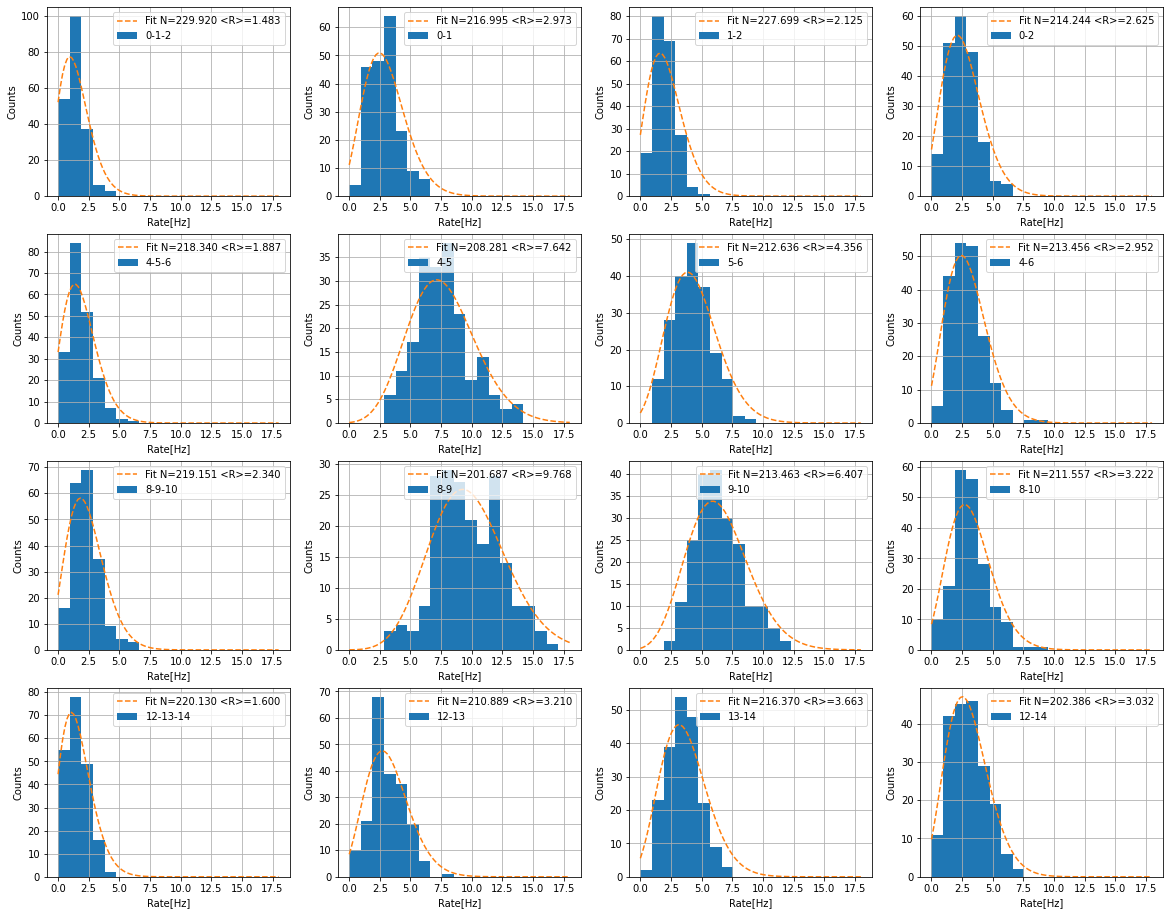





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-3 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.500 +/- 0.014 (stat)    0.454 +/- 0.037 (fit)       Compatibilità: 1.174sigma
	eff. detector 13 (high)= 0.641 +/- 0.018 (stat)    0.688 +/- 0.061 (fit)       Compatibilità: 0.749sigma
	eff. detector 1 (middle)= 0.667 +/- 0.022 (stat)    0.523 +/- 0.043 (fit)       Compatibilità: 2.950sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.218 +/- 0.008 (stat)    0.218 +/- 0.014 (fit)       Compatibilità: 0.052sigma
	eff. detector 2 (high)= 0.362 +/- 0.013 (stat)    0.405 +/- 0.027 (fit)       Compatibilità: 1.428sigma
	eff. detector 15 (middle)= 0.617 +/- 0.025 (stat)    0.605 +/- 0.044 (fit)       Compatibilità: 0.224sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.229 +/- 0.007 (stat)    0.217 +/- 0.012 (fit)       Compatibilità: 0.849sigma
	eff. detec

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_2s_Vth_3mV.dat", 3, 2)

####Δt=10s, Vth=-3mV

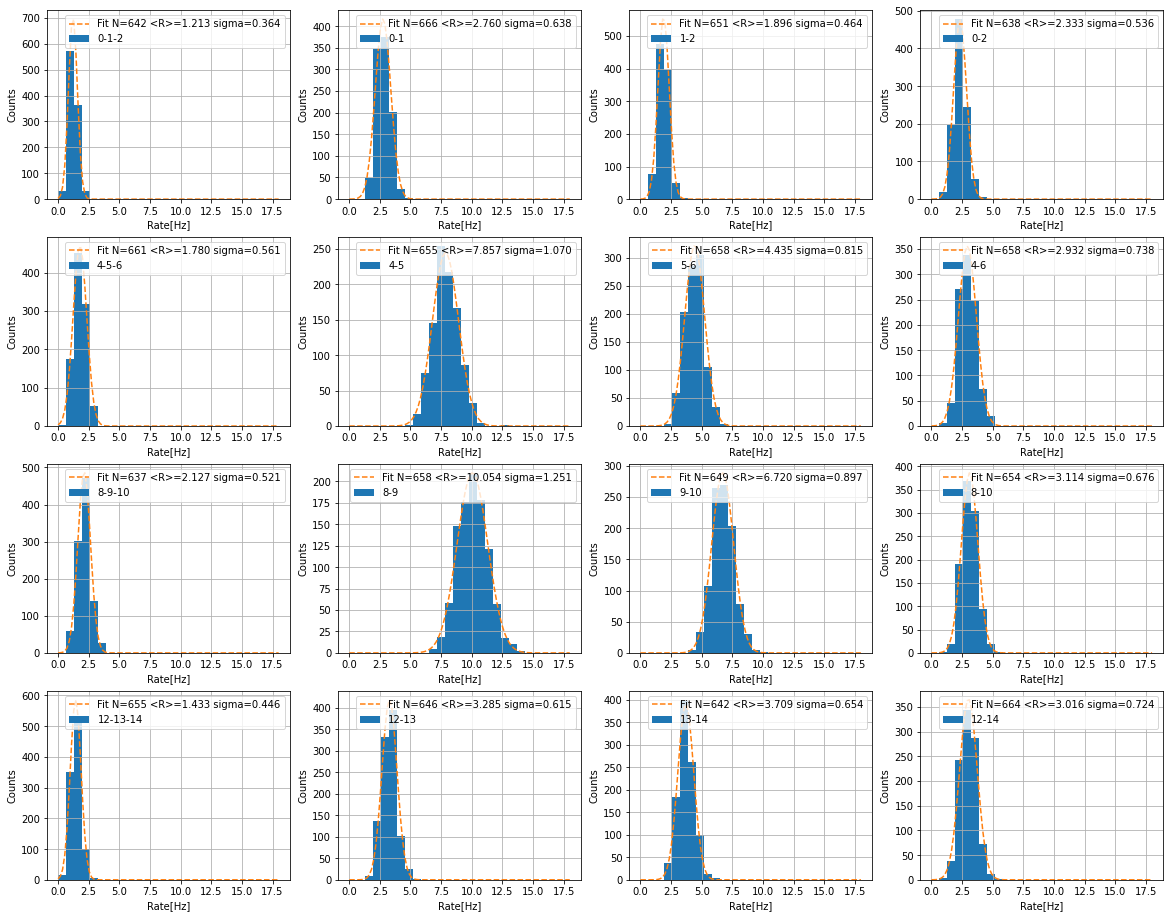





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-3 mV, dt=10 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.4800 +/- 0.0005 (stat)    0.448 +/- 0.015 (fit)       Compatibilità: 2.130sigma
	eff. detector 13 (high)= 0.6545 +/- 0.0007 (stat)    0.666 +/- 0.024 (fit)       Compatibilità: 0.498sigma
	eff. detector 1 (middle)= 0.6692 +/- 0.0008 (stat)    0.532 +/- 0.018 (fit)       Compatibilità: 7.576sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.2334 +/- 0.0003 (stat)    0.230 +/- 0.006 (fit)       Compatibilità: 0.558sigma
	eff. detector 2 (high)= 0.4145 +/- 0.0005 (stat)    0.409 +/- 0.011 (fit)       Compatibilità: 0.448sigma
	eff. detector 15 (middle)= 0.7179 +/- 0.0011 (stat)    0.607 +/- 0.018 (fit)       Compatibilità: 6.211sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.2484 +/- 0.0003 (stat)    0.213 +/- 0.005 (fit)       Compatibilità: 7.103si

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_10s_Vth_3mV.dat",3,10)

####Δt=16s, Vth=-3mV

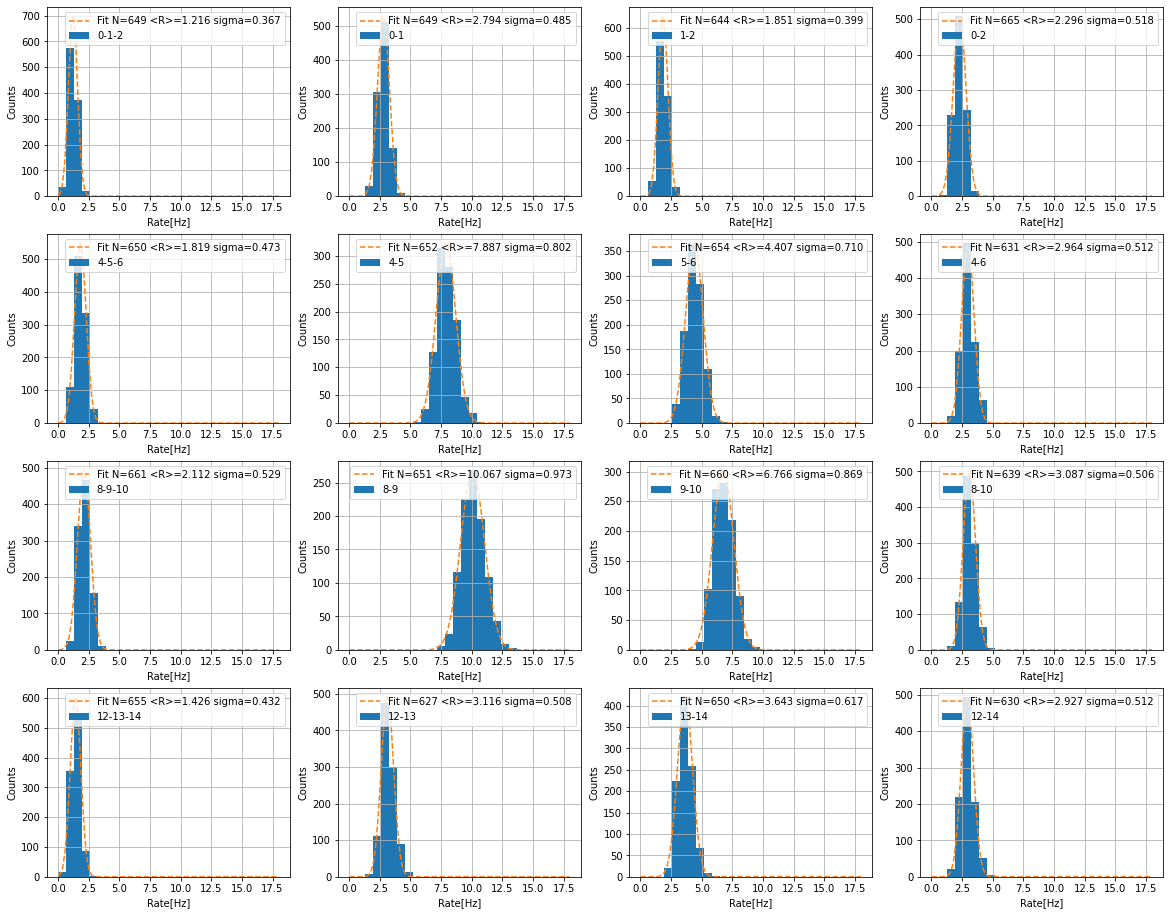





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-3 mV, dt=16 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.4447 +/- 0.0004 (stat)    0.442 +/- 0.015 (fit)       Compatibilità: 0.185sigma
	eff. detector 13 (high)= 0.5524 +/- 0.0005 (stat)    0.665 +/- 0.024 (fit)       Compatibilità: 4.645sigma
	eff. detector 1 (middle)= 0.5178 +/- 0.0004 (stat)    0.538 +/- 0.019 (fit)       Compatibilità: 1.082sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.1847 +/- 0.0001 (stat)    0.230 +/- 0.006 (fit)       Compatibilità: 7.542sigma
	eff. detector 2 (high)= 0.4112 +/- 0.0004 (stat)    0.412 +/- 0.011 (fit)       Compatibilità: 0.052sigma
	eff. detector 15 (middle)= 0.5913 +/- 0.0005 (stat)    0.606 +/- 0.018 (fit)       Compatibilità: 0.813sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.1883 +/- 0.0001 (stat)    0.211 +/- 0.005 (fit)       Compatibilità: 4.559si

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_16s_Vth_3mV.dat",3,16)

#### Δt=1 s, Vth=6 mV

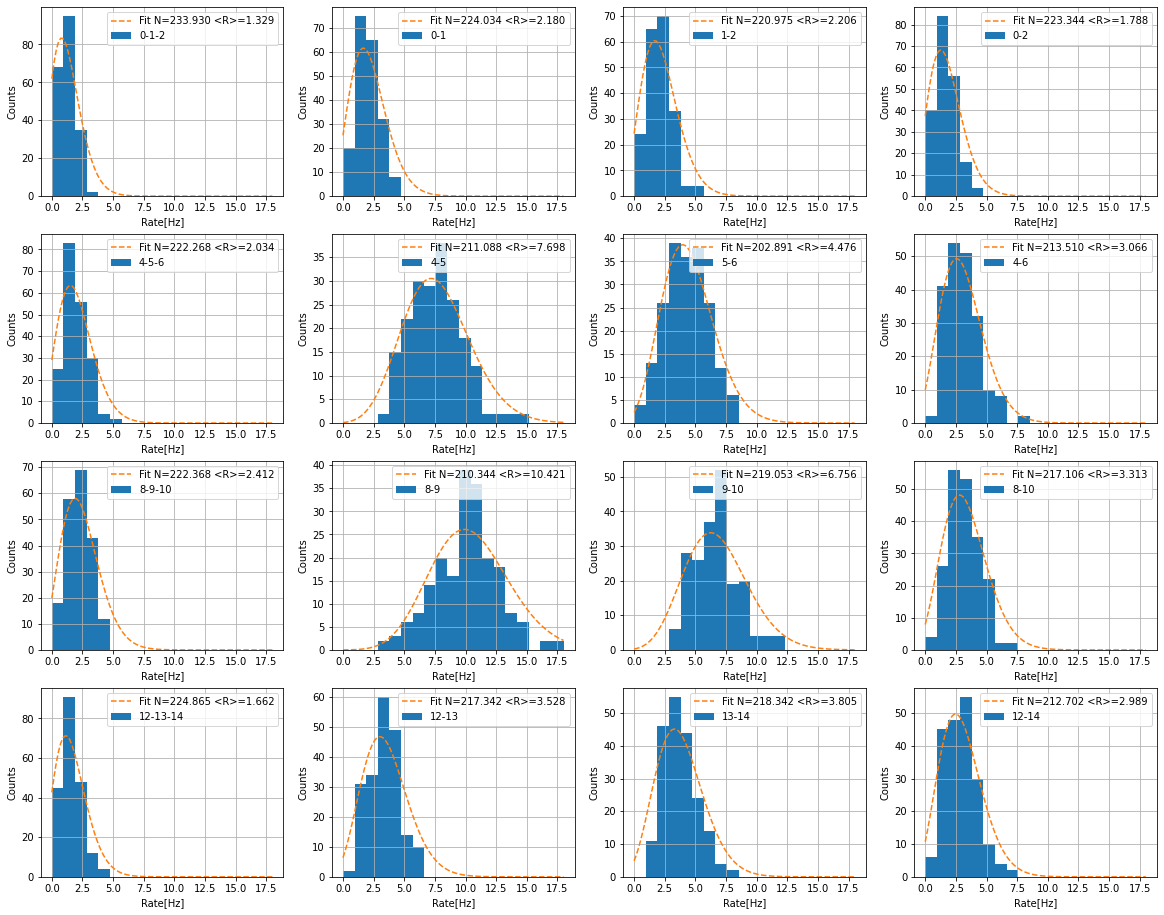





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-6 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.605 +/- 0.016 (stat)    0.547 +/- 0.052 (fit)       Compatibilità: 1.063sigma
	eff. detector 13 (high)= 0.652 +/- 0.018 (stat)    0.548 +/- 0.052 (fit)       Compatibilità: 1.885sigma
	eff. detector 1 (middle)= 0.815 +/- 0.024 (stat)    0.681 +/- 0.067 (fit)       Compatibilità: 1.866sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.251 +/- 0.007 (stat)    0.230 +/- 0.014 (fit)       Compatibilità: 1.322sigma
	eff. detector 2 (high)= 0.529 +/- 0.017 (stat)    0.417 +/- 0.028 (fit)       Compatibilità: 3.413sigma
	eff. detector 15 (middle)= 0.718 +/- 0.025 (stat)    0.602 +/- 0.043 (fit)       Compatibilità: 2.341sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.282 +/- 0.006 (stat)    0.205 +/- 0.012 (fit)       Compatibilità: 5.885sigma
	eff. detec

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_1s_Vth_6mV.dat", 6, 1)

#### Δt=2s, Vth=6mV

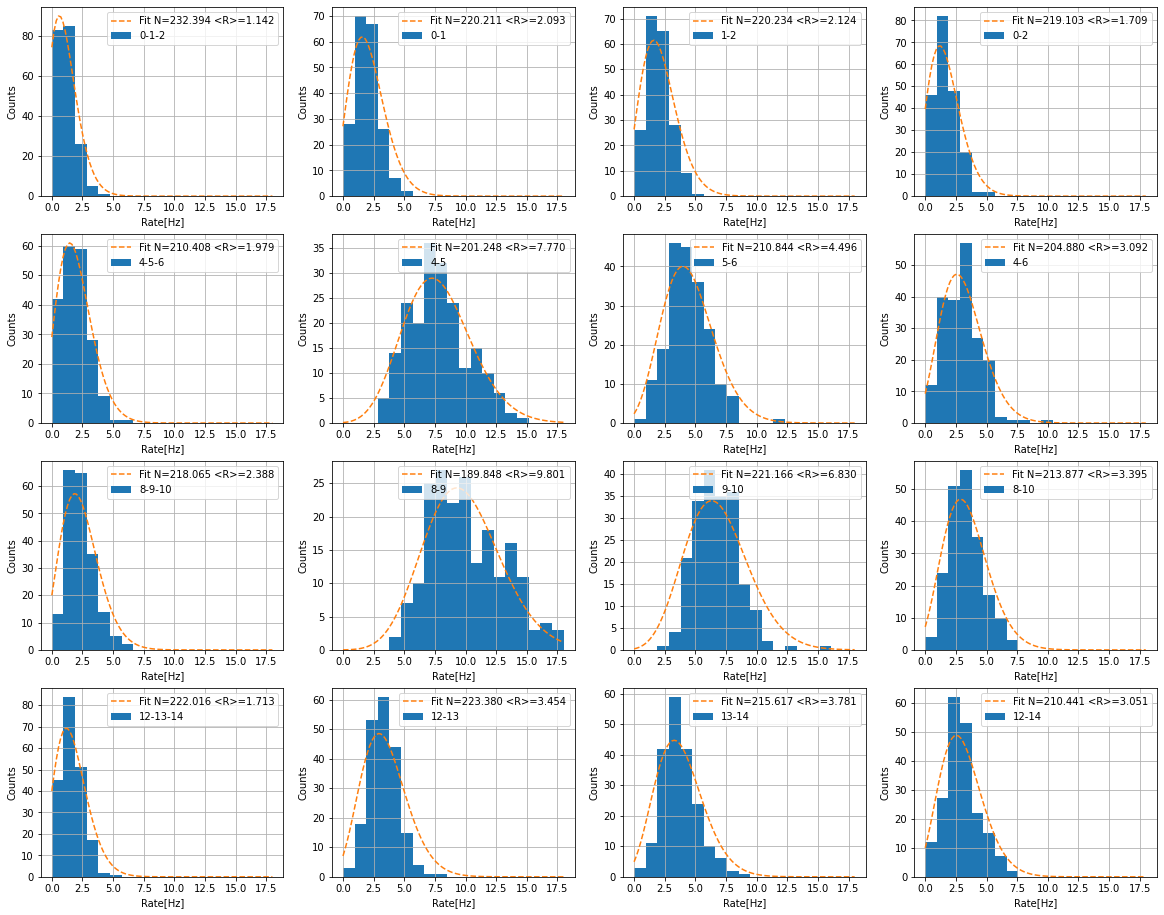





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-6 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.576 +/- 0.022 (stat)    0.567 +/- 0.052 (fit)       Compatibilità: 0.149sigma
	eff. detector 13 (high)= 0.537 +/- 0.020 (stat)    0.559 +/- 0.051 (fit)       Compatibilità: 0.394sigma
	eff. detector 1 (middle)= 0.744 +/- 0.030 (stat)    0.683 +/- 0.064 (fit)       Compatibilità: 0.858sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.228 +/- 0.008 (stat)    0.227 +/- 0.014 (fit)       Compatibilità: 0.066sigma
	eff. detector 2 (high)= 0.408 +/- 0.016 (stat)    0.410 +/- 0.027 (fit)       Compatibilità: 0.065sigma
	eff. detector 15 (middle)= 0.718 +/- 0.033 (stat)    0.615 +/- 0.043 (fit)       Compatibilità: 1.911sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.319 +/- 0.009 (stat)    0.215 +/- 0.012 (fit)       Compatibilità: 6.969sigma
	eff. detec

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_2s_Vth_6mV.dat",6,2)

####Δt=10s, Vth=-6mV

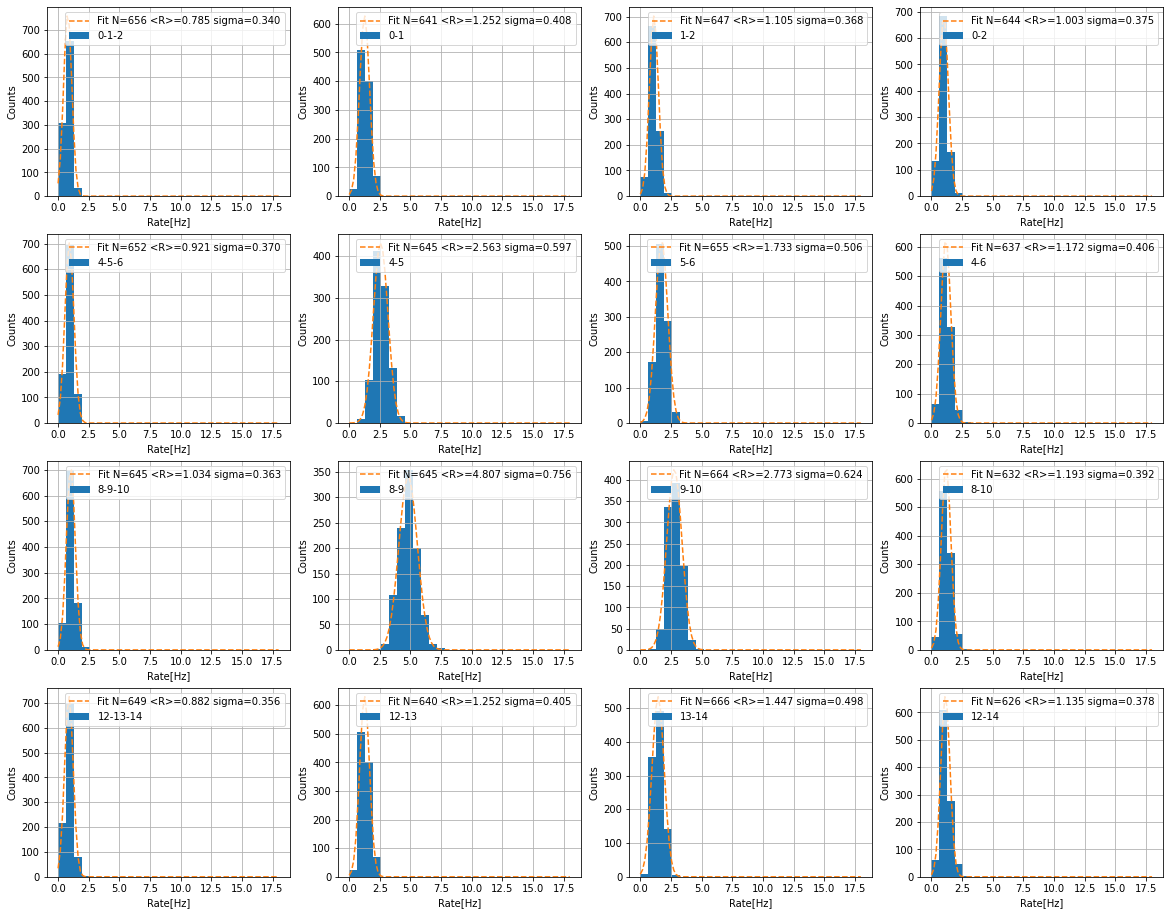





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-6 mV, dt=10 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.6285 +/- 0.0009 (stat)    0.600 +/- 0.026 (fit)       Compatibilità: 1.101sigma
	eff. detector 13 (high)= 0.7556 +/- 0.0011 (stat)    0.716 +/- 0.033 (fit)       Compatibilità: 1.199sigma
	eff. detector 1 (middle)= 0.9493 +/- 0.0016 (stat)    0.773 +/- 0.036 (fit)       Compatibilità: 4.928sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.4158 +/- 0.0006 (stat)    0.357 +/- 0.013 (fit)       Compatibilità: 4.428sigma
	eff. detector 2 (high)= 0.5579 +/- 0.0008 (stat)    0.535 +/- 0.021 (fit)       Compatibilità: 1.069sigma
	eff. detector 15 (middle)= 0.9568 +/- 0.0017 (stat)    0.766 +/- 0.033 (fit)       Compatibilità: 5.838sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.2388 +/- 0.0003 (stat)    0.222 +/- 0.007 (fit)       Compatibilità: 2.254si

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/rates_gate_10s_Vth_6mV.dat",6,10)

####Δt=16s, Vth=-6mV

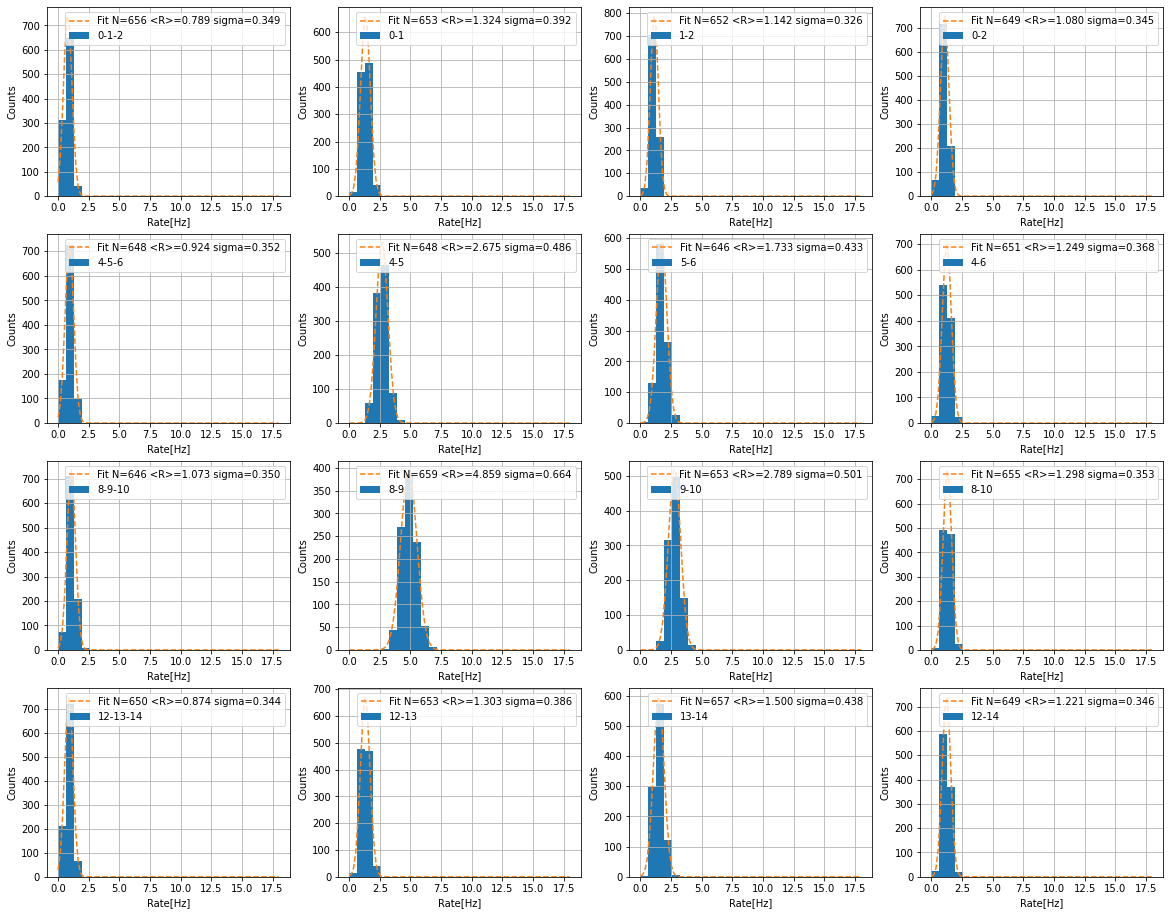





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-6 mV, dt=16 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.5999 +/- 0.0007 (stat)    0.609 +/- 0.026 (fit)       Compatibilità: 0.330sigma
	eff. detector 13 (high)= 0.5683 +/- 0.0006 (stat)    0.728 +/- 0.033 (fit)       Compatibilità: 4.829sigma
	eff. detector 1 (middle)= 0.7218 +/- 0.0008 (stat)    0.781 +/- 0.036 (fit)       Compatibilità: 1.635sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.3164 +/- 0.0003 (stat)    0.351 +/- 0.013 (fit)       Compatibilità: 2.596sigma
	eff. detector 2 (high)= 0.5595 +/- 0.0006 (stat)    0.535 +/- 0.021 (fit)       Compatibilità: 1.134sigma
	eff. detector 15 (middle)= 0.7676 +/- 0.0008 (stat)    0.757 +/- 0.033 (fit)       Compatibilità: 0.338sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.1885 +/- 0.0002 (stat)    0.220 +/- 0.007 (fit)       Compatibilità: 4.268si

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/rates_gate_16s_Vth_6mV.dat",6,16)

####Δt=1s, Vth=9mV

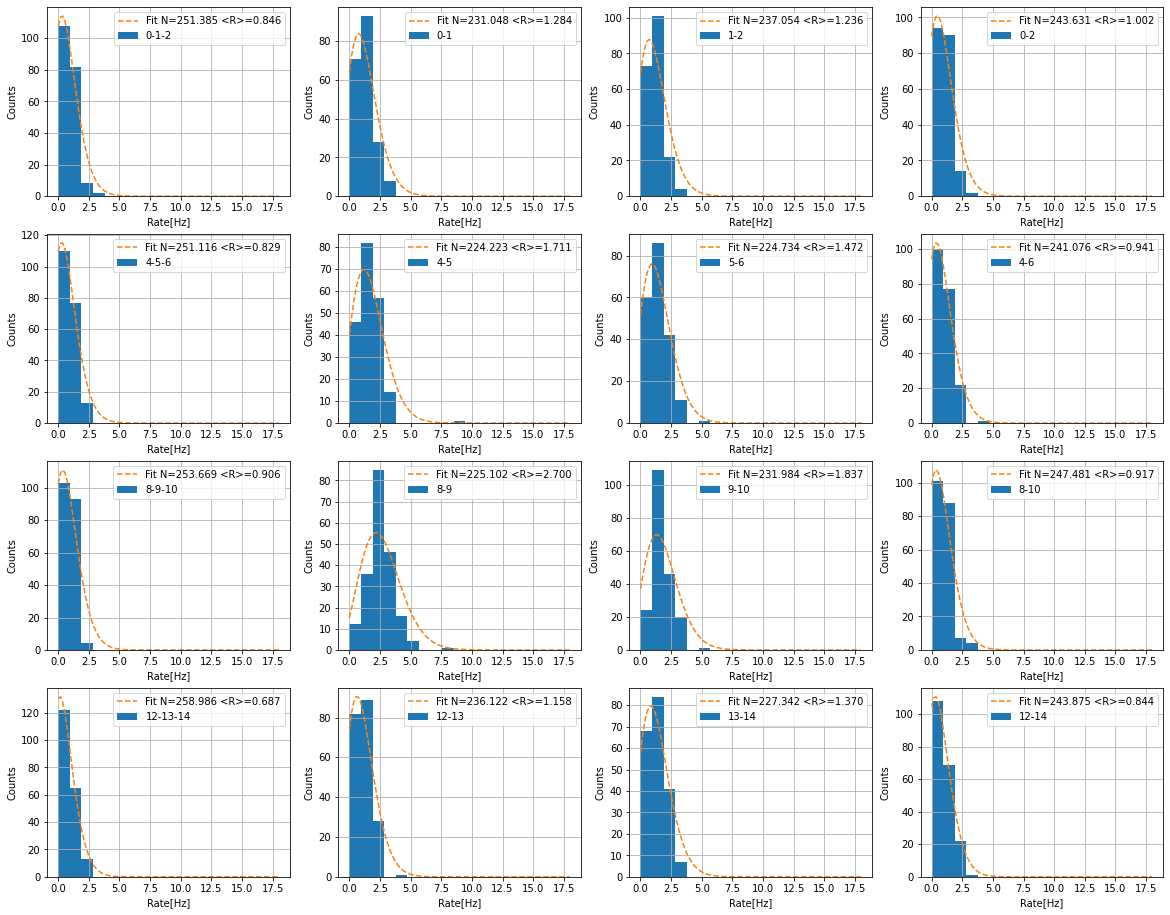





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-9 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.709 +/- 0.025 (stat)    0.650 +/- 0.073 (fit)       Compatibilità: 0.757sigma
	eff. detector 13 (high)= 0.754 +/- 0.026 (stat)    0.741 +/- 0.087 (fit)       Compatibilità: 0.140sigma
	eff. detector 1 (middle)= 0.961 +/- 0.037 (stat)    0.850 +/- 0.101 (fit)       Compatibilità: 1.036sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.562 +/- 0.025 (stat)    0.443 +/- 0.050 (fit)       Compatibilità: 2.122sigma
	eff. detector 2 (high)= 0.598 +/- 0.026 (stat)    0.526 +/- 0.062 (fit)       Compatibilità: 1.090sigma
	eff. detector 15 (middle)= 1.031 +/- 0.053 (stat)    0.838 +/- 0.108 (fit)       Compatibilità: 1.609sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.423 +/- 0.011 (stat)    0.308 +/- 0.032 (fit)       Compatibilità: 3.475sigma
	eff. detec

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_1s_Vth_9mV.dat", 9,1)

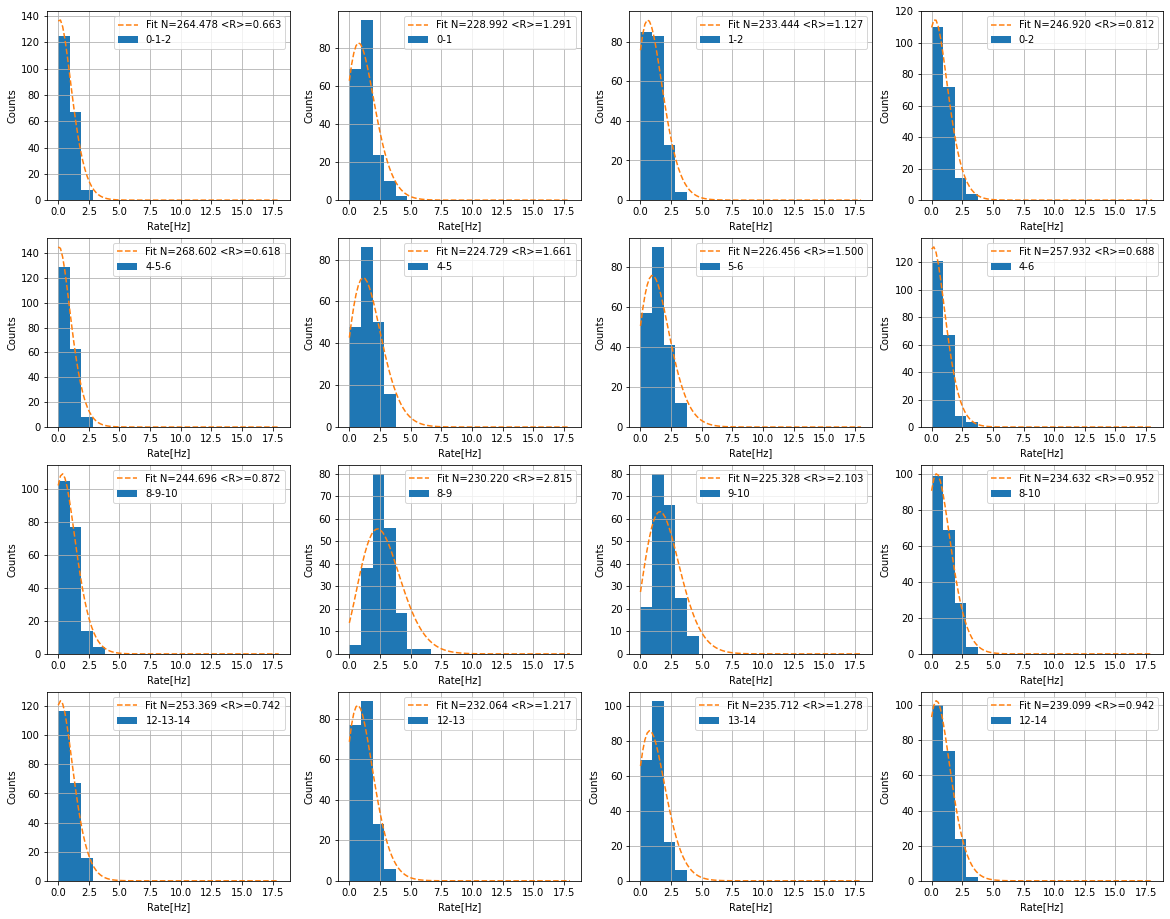





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-9 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.774 +/- 0.034 (stat)    0.625 +/- 0.069 (fit)       Compatibilità: 1.931sigma
	eff. detector 13 (high)= 0.684 +/- 0.027 (stat)    0.684 +/- 0.076 (fit)       Compatibilità: 0.001sigma
	eff. detector 1 (middle)= 1.045 +/- 0.049 (stat)    0.874 +/- 0.101 (fit)       Compatibilità: 1.527sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.459 +/- 0.017 (stat)    0.435 +/- 0.048 (fit)       Compatibilità: 0.455sigma
	eff. detector 2 (high)= 0.597 +/- 0.024 (stat)    0.500 +/- 0.057 (fit)       Compatibilità: 1.564sigma
	eff. detector 15 (middle)= 1.138 +/- 0.060 (stat)    0.852 +/- 0.102 (fit)       Compatibilità: 2.408sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.226 +/- 0.008 (stat)    0.323 +/- 0.030 (fit)       Compatibilità: 3.126sigma
	eff. detec

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_1s_Vth_9mV_revange.dat",9,1)

####Δt=2s, Vth=9mV

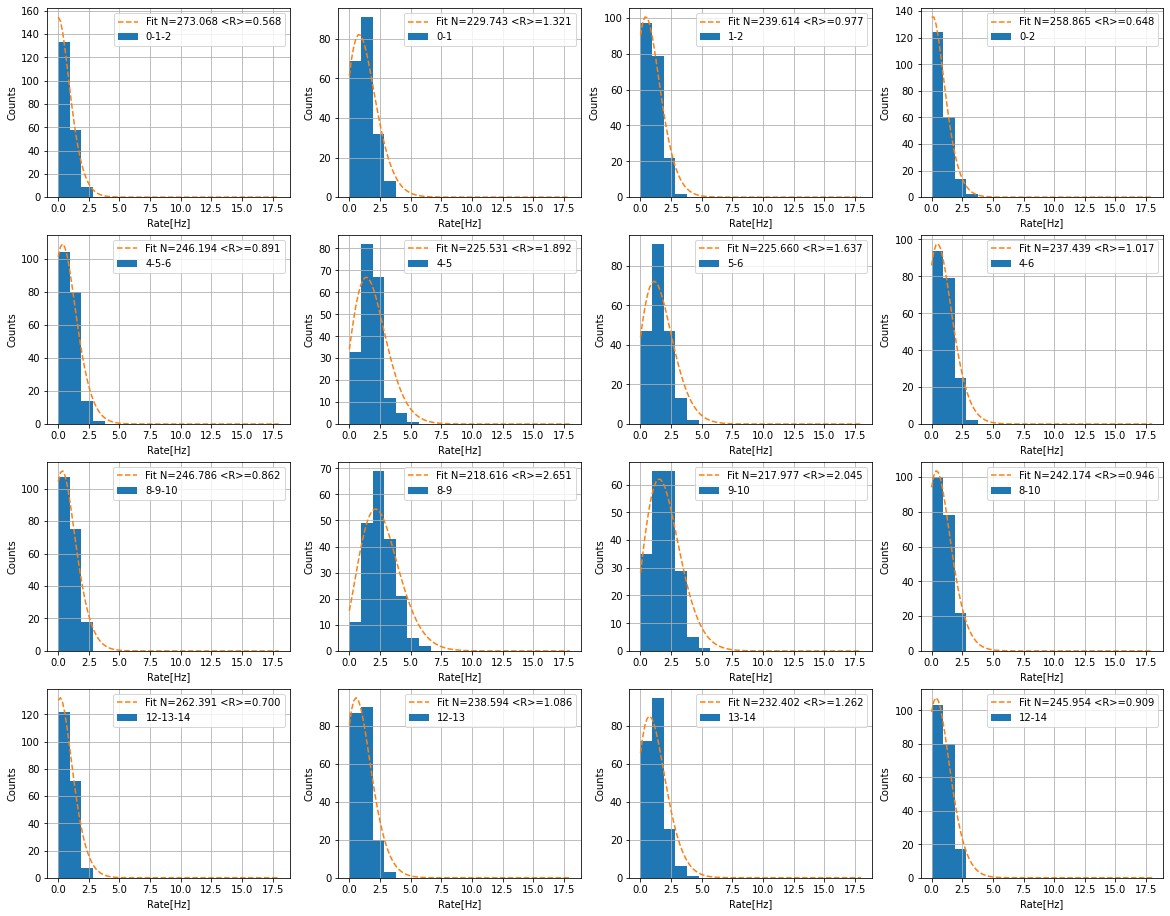





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-9 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.575 +/- 0.024 (stat)    0.565 +/- 0.063 (fit)       Compatibilità: 0.153sigma
	eff. detector 13 (high)= 0.753 +/- 0.034 (stat)    0.699 +/- 0.080 (fit)       Compatibilità: 0.629sigma
	eff. detector 1 (middle)= 0.970 +/- 0.048 (stat)    0.877 +/- 0.101 (fit)       Compatibilità: 0.837sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.454 +/- 0.017 (stat)    0.490 +/- 0.050 (fit)       Compatibilità: 0.689sigma
	eff. detector 2 (high)= 0.557 +/- 0.021 (stat)    0.582 +/- 0.062 (fit)       Compatibilità: 0.388sigma
	eff. detector 15 (middle)= 0.849 +/- 0.035 (stat)    0.890 +/- 0.103 (fit)       Compatibilità: 0.378sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.324 +/- 0.012 (stat)    0.308 +/- 0.031 (fit)       Compatibilità: 0.492sigma
	eff. detec

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_2s_Vth_9mV.dat",9,2)

####Δt=10sm Vth=-9mV

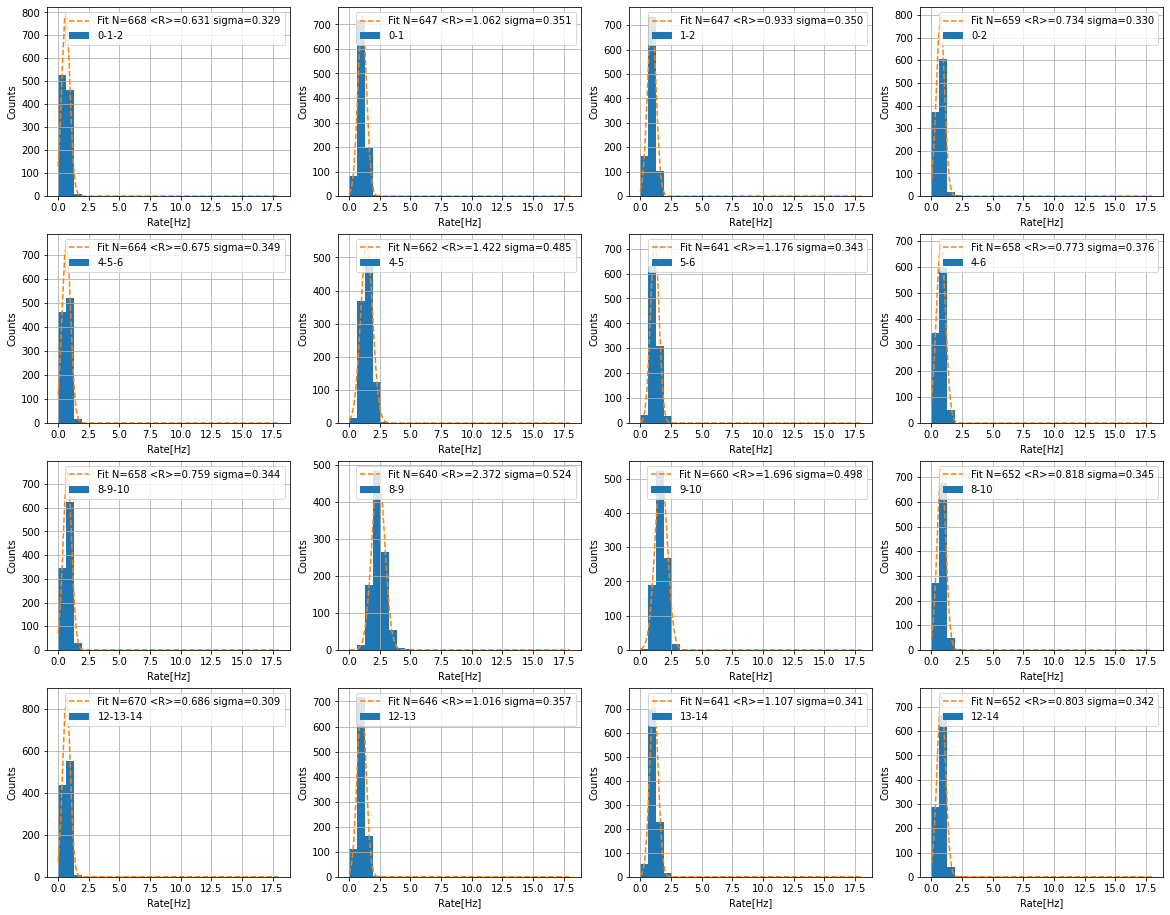





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-9 mV, dt=10 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.5903 +/- 0.0009 (stat)    0.600 +/- 0.029 (fit)       Compatibilità: 0.342sigma
	eff. detector 13 (high)= 0.6925 +/- 0.0011 (stat)    0.683 +/- 0.034 (fit)       Compatibilità: 0.282sigma
	eff. detector 1 (middle)= 0.9379 +/- 0.0017 (stat)    0.860 +/- 0.045 (fit)       Compatibilità: 1.719sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.5075 +/- 0.0008 (stat)    0.471 +/- 0.021 (fit)       Compatibilità: 1.745sigma
	eff. detector 2 (high)= 0.5437 +/- 0.0009 (stat)    0.572 +/- 0.027 (fit)       Compatibilità: 1.060sigma
	eff. detector 15 (middle)= 1.0079 +/- 0.0020 (stat)    0.875 +/- 0.045 (fit)       Compatibilità: 2.986sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.3807 +/- 0.0005 (stat)    0.315 +/- 0.013 (fit)       Compatibilità: 5.082si

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/rates_gate_10s_Vth_9mV.dat",9,10)

####Δt=1s, Vth=-15mV

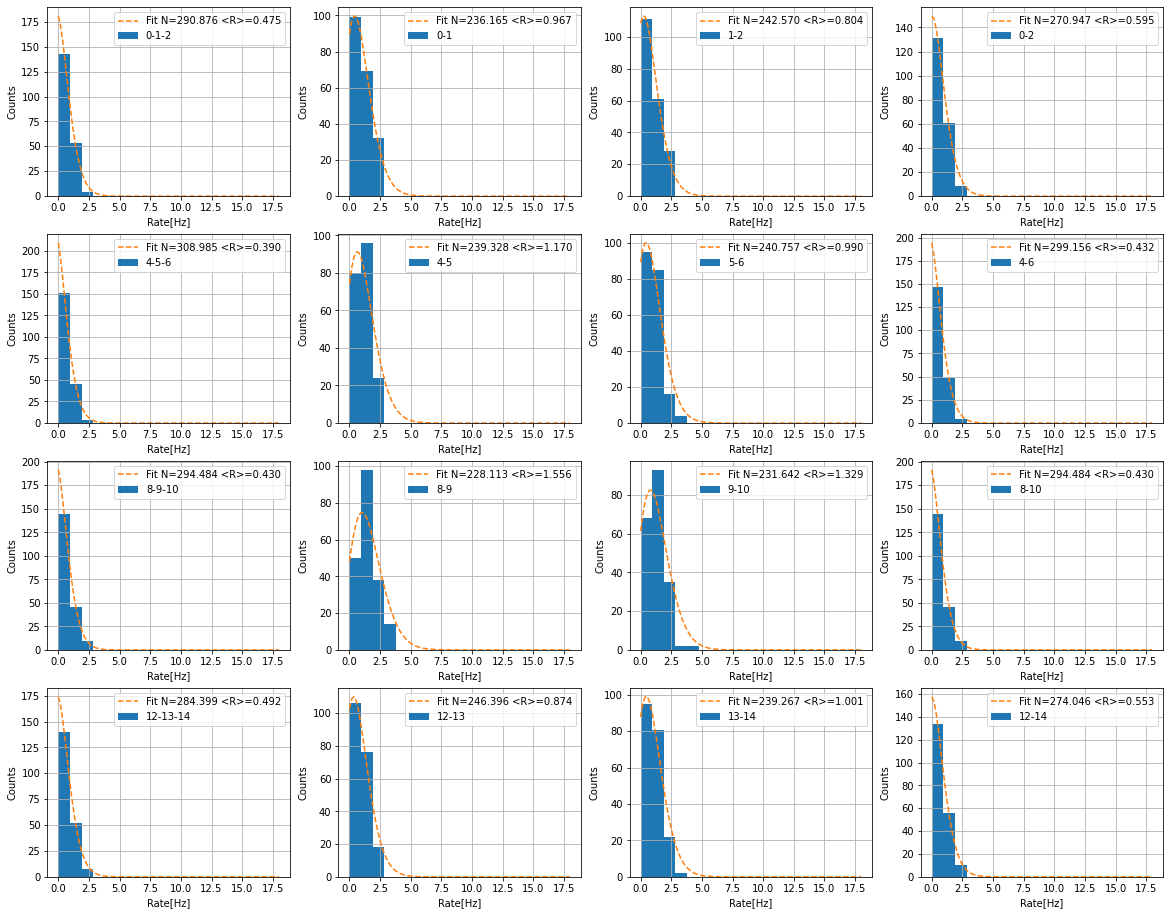





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-15 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.669 +/- 0.034 (stat)    0.600 +/- 0.072 (fit)       Compatibilità: 0.858sigma
	eff. detector 13 (high)= 0.869 +/- 0.050 (stat)    0.683 +/- 0.084 (fit)       Compatibilità: 1.903sigma
	eff. detector 1 (middle)= 0.862 +/- 0.043 (stat)    0.872 +/- 0.112 (fit)       Compatibilità: 0.087sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.451 +/- 0.015 (stat)    0.509 +/- 0.059 (fit)       Compatibilità: 0.957sigma
	eff. detector 2 (high)= 0.671 +/- 0.027 (stat)    0.572 +/- 0.068 (fit)       Compatibilità: 1.349sigma
	eff. detector 15 (middle)= 1.010 +/- 0.044 (stat)    0.920 +/- 0.112 (fit)       Compatibilità: 0.747sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.406 +/- 0.015 (stat)    0.428 +/- 0.046 (fit)       Compatibilità: 0.470sigma
	eff. dete

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_1s_Vth_15mV.dat",15,1)

####Δt=2s,Vth=-15mV

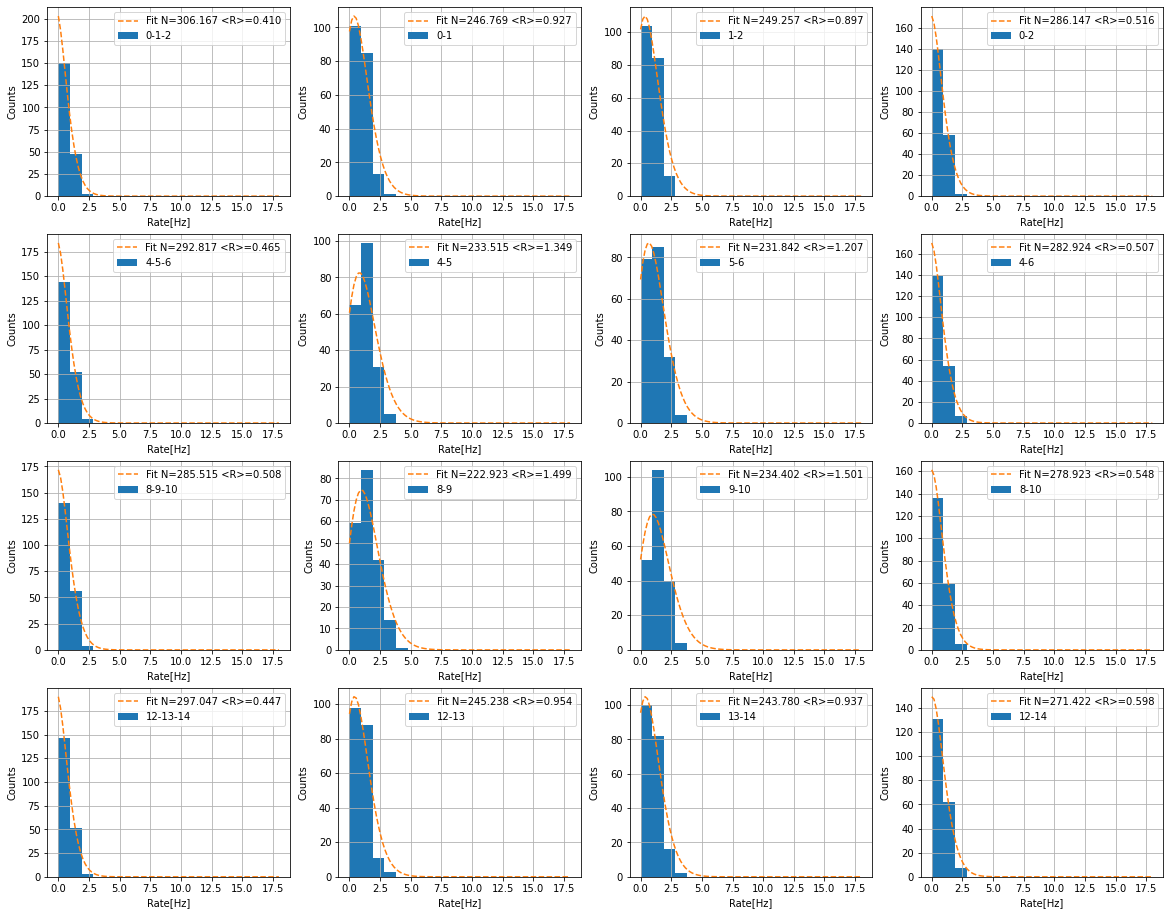





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-15 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.653 +/- 0.022 (stat)    0.605 +/- 0.073 (fit)       Compatibilità: 0.627sigma
	eff. detector 13 (high)= 0.722 +/- 0.025 (stat)    0.654 +/- 0.081 (fit)       Compatibilità: 0.792sigma
	eff. detector 1 (middle)= 0.881 +/- 0.031 (stat)    0.908 +/- 0.116 (fit)       Compatibilità: 0.222sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.477 +/- 0.019 (stat)    0.494 +/- 0.058 (fit)       Compatibilità: 0.277sigma
	eff. detector 2 (high)= 0.534 +/- 0.022 (stat)    0.511 +/- 0.060 (fit)       Compatibilità: 0.354sigma
	eff. detector 15 (middle)= 0.985 +/- 0.047 (stat)    0.952 +/- 0.121 (fit)       Compatibilità: 0.258sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.544 +/- 0.019 (stat)    0.424 +/- 0.048 (fit)       Compatibilità: 2.329sigma
	eff. dete

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_2s_Vth_15mV.dat",15,2)

####Δt=1s,Vth=-20mV

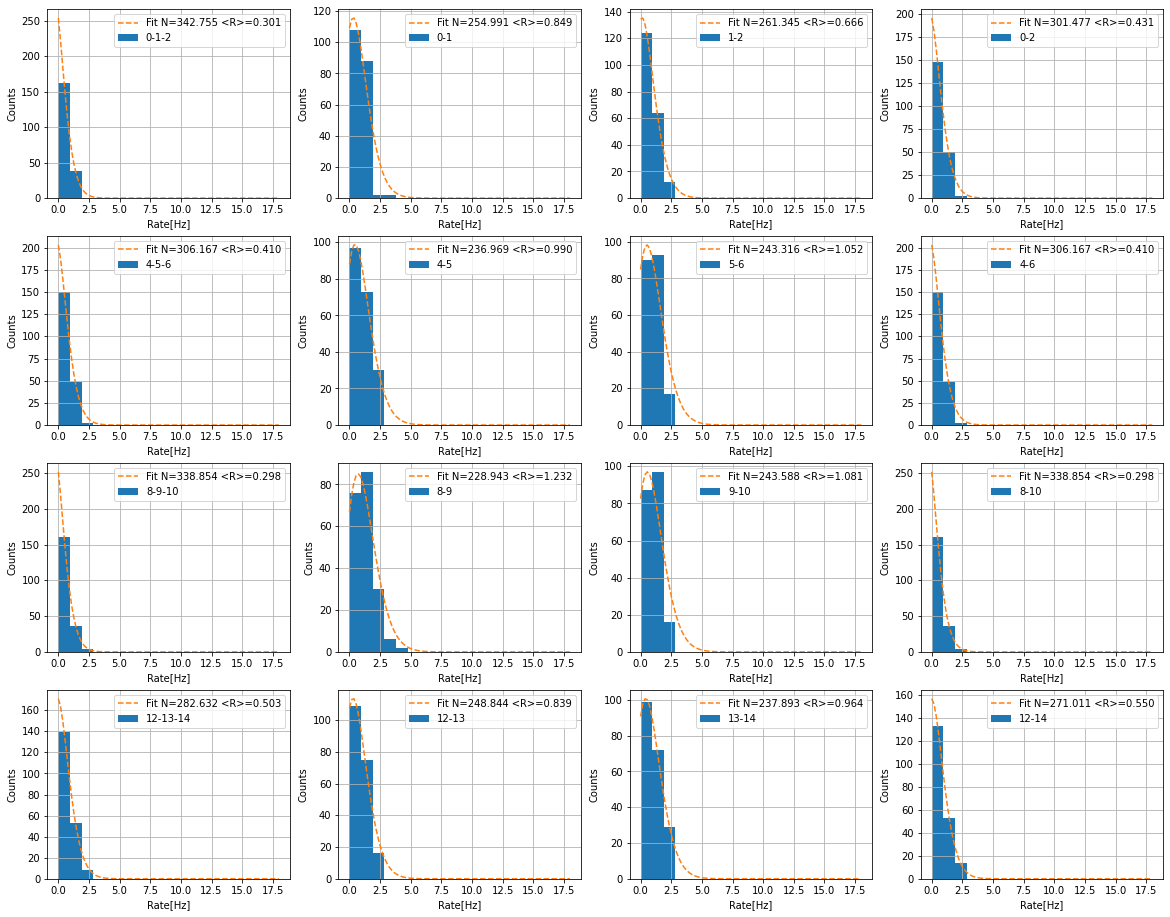





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-20 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.636 +/- 0.024 (stat)    0.598 +/- 0.076 (fit)       Compatibilità: 0.479sigma
	eff. detector 13 (high)= 0.671 +/- 0.025 (stat)    0.639 +/- 0.079 (fit)       Compatibilità: 0.389sigma
	eff. detector 1 (middle)= 0.819 +/- 0.032 (stat)    0.817 +/- 0.102 (fit)       Compatibilità: 0.026sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.644 +/- 0.025 (stat)    0.546 +/- 0.064 (fit)       Compatibilità: 1.420sigma
	eff. detector 2 (high)= 0.550 +/- 0.019 (stat)    0.614 +/- 0.077 (fit)       Compatibilità: 0.801sigma
	eff. detector 15 (middle)= 1.031 +/- 0.042 (stat)    1.011 +/- 0.129 (fit)       Compatibilità: 0.147sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.495 +/- 0.023 (stat)    0.403 +/- 0.046 (fit)       Compatibilità: 1.806sigma
	eff. dete

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_1s_Vth_20mV.dat",20,1)

####Δt=2s,Vth=-20mV

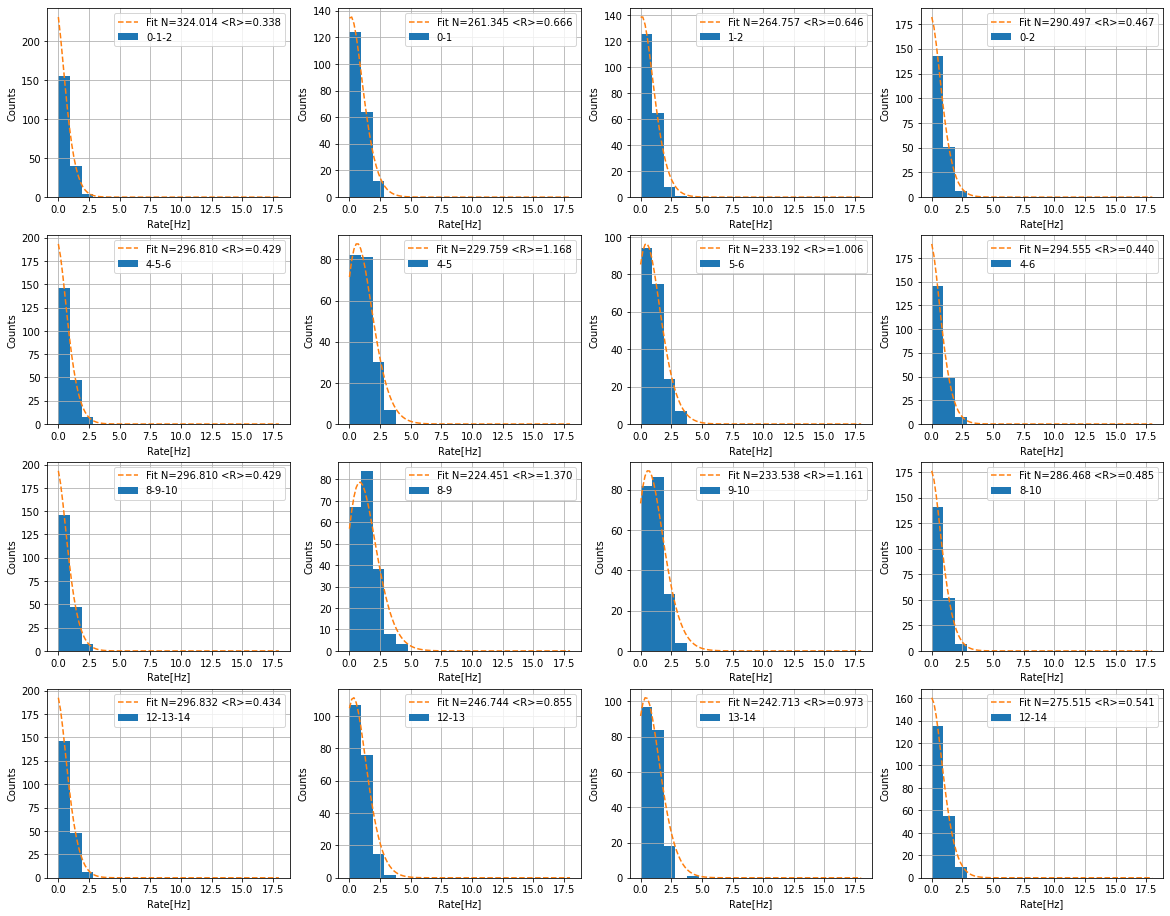





----------------------------------SCHEDA SINISTRA------------------------------------
-------------------------V=900 V, Threshold=-20 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 14 (low)= 0.641 +/- 0.035 (stat)    0.660 +/- 0.080 (fit)       Compatibilità: 0.214sigma
	eff. detector 13 (high)= 0.681 +/- 0.038 (stat)    0.716 +/- 0.089 (fit)       Compatibilità: 0.369sigma
	eff. detector 1 (middle)= 0.846 +/- 0.050 (stat)    0.850 +/- 0.107 (fit)       Compatibilità: 0.037sigma


----TRIPLETTA N°2-----
	eff. detector 3 (low)= 0.562 +/- 0.025 (stat)    0.524 +/- 0.058 (fit)       Compatibilità: 0.594sigma
	eff. detector 2 (high)= 0.636 +/- 0.030 (stat)    0.576 +/- 0.064 (fit)       Compatibilità: 0.852sigma
	eff. detector 15 (middle)= 0.952 +/- 0.046 (stat)    0.982 +/- 0.116 (fit)       Compatibilità: 0.245sigma


----TRIPLETTA N°3-----
	eff. detector 17 (low)= 0.443 +/- 0.022 (stat)    0.417 +/- 0.046 (fit)       Compatibilità: 0.510sigma
	eff. dete

In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/rates_gate_2s_Vth_20mV.dat",20,2)

##Scheda destra

In [ ]:
from scipy.stats import describe
from scipy.special import factorial

def Poisson(x,N,alpha):
  return np.array(N*alpha**x*m.exp(-alpha)/factorial(x))

def Gaussian(x,N,mu,sig):
  return np.array(N*np.exp(-(x-mu)**2/(2*sig**2))/np.sqrt(2*m.pi*sig**2))

def analysis_rate(file_in, Vth, dt):
  data = leggi_file(file_in)
  labels=['0-1-2','0-1','1-2','0-2','4-5-6','4-5','5-6','4-6']
  data.columns=[labels[i] for i in range(len(labels))]

  rate_stats=[describe(data[labels[i]]) for i in range(len(labels))]
  rate_mean = [(rate_stats[i][2]/np.sqrt(rate_stats[i][3]))**2 for i in range(len(labels))]
  rate_std = [np.sqrt(rate_stats[i][3]/data[labels[i]].size) for i in range(len(labels))]


  mean_rates = np.mean(data[labels])
  x = np.linspace(0,18, 100)
  err_rates = []
  new_mean_rates = []
  k=0

  fig,axes=plt.subplots(2,4,sharey=False,figsize=(20,8))
  for i in range(0,2):
    for j in range(0,4):
      if dt > 9:
        x_max_=15
        bins_=23
      else:
        x_max_=18
        bins_=19
      binned_rates, bins, _ = axes[i,j].hist(data[labels[j+k]], bins=bins_, range=(0,x_max_), label=labels[j+k])
      axes[i,j].set_xlabel('Rate[Hz]')
      axes[i,j].set_ylabel('Counts')
      axes[i,j].grid()

      centered_bins = np.array([(bins[p]+bins[p+1])/2  for p in range(0, bins.size-1)])
      if dt < 9:
        fit_pars, cov_matrix = fit(Poisson, centered_bins, binned_rates, p0=[data[labels[j+k]].size, mean_rates[labels[j+k]]])
        axes[i,j].plot(x, Poisson(x, fit_pars[0], fit_pars[1]), '--', label="Fit N={:.3f} <R>={:.3f}".format(fit_pars[0], fit_pars[1]))
      else:
        fit_pars, cov_matrix = fit(Gaussian, centered_bins, binned_rates, p0=[data[labels[j+k]].size, mean_rates[labels[j+k]], rate_std[j+k]*np.sqrt(data[labels[j+k]].size)])
        axes[i,j].plot(x, Gaussian(x, fit_pars[0], fit_pars[1], fit_pars[2]), '--', label="Fit N={:d} <R>={:.3f} sigma={:.3f}".format(int(fit_pars[0]), fit_pars[1], fit_pars[2]))
      axes[i,j].legend(loc='upper right')

      new_mean_rates.append(fit_pars[1])
      err_rates.append(np.sqrt(fit_pars[1]/data[labels[i]].size))

    k=k+4

  plt.show()
  plt.close()
  print("\n\n\n")

  triplet_counter = 1
  PMT_number = ['19', '7', '20', '10', '22', '11'] 
  PMT_label = ['low', 'high', 'middle']
  print("-----------------------------------SCHEDA DESTRA-------------------------------------")
  print("-------------------------V=900 V, Threshold=-{:d} mV, dt={:d} s----------------------------".format(Vth, dt))
  for i in range(0, 2):
    print("----TRIPLETTA N°{}-----".format(triplet_counter))
    for j in range(1, 4):
        eff_stat = rate_mean[4*i]/rate_mean[4*i+j]
        err_stat = np.sqrt((rate_mean[4*i]*rate_std[4*i+j]/rate_mean[4*i+j]**2)**2 + (rate_std[4*i]/rate_mean[4*i+j])**2)
        eff = mean_rates[labels[4*i]]/mean_rates[labels[4*i+j]]
        err = np.sqrt((mean_rates[labels[4*i]]*err_rates[4*i+j]/mean_rates[labels[4*i+j]]**2)**2 + (err_rates[4*i]/mean_rates[labels[4*i+j]])**2)
        comp = np.absolute(eff_stat - eff)/np.sqrt(err**2+err_stat**2)
        if data[labels[1]].size >=1000:
          print("\teff. detector {} ({})= {:.4f} +/- {:.4f} (stat)    {:.3f} +/- {:.3f} (fit)       Compatibilità: {:.3f}sigma".format(PMT_number[3*i+j-1], PMT_label[j-1], eff_stat, err_stat, eff, err, comp))
        else:
          print("\teff. detector {} ({})= {:.3f} +/- {:.3f} (stat)    {:.3f} +/- {:.3f} (fit)       Compatibilità: {:.3f}sigma".format(PMT_number[3*i+j-1], PMT_label[j-1], eff_stat, err_stat, eff, err, comp))
    triplet_counter = triplet_counter + 1
    print("\n")

### Analisi dati 04/04

####Δt=1s, Vth=-3mV

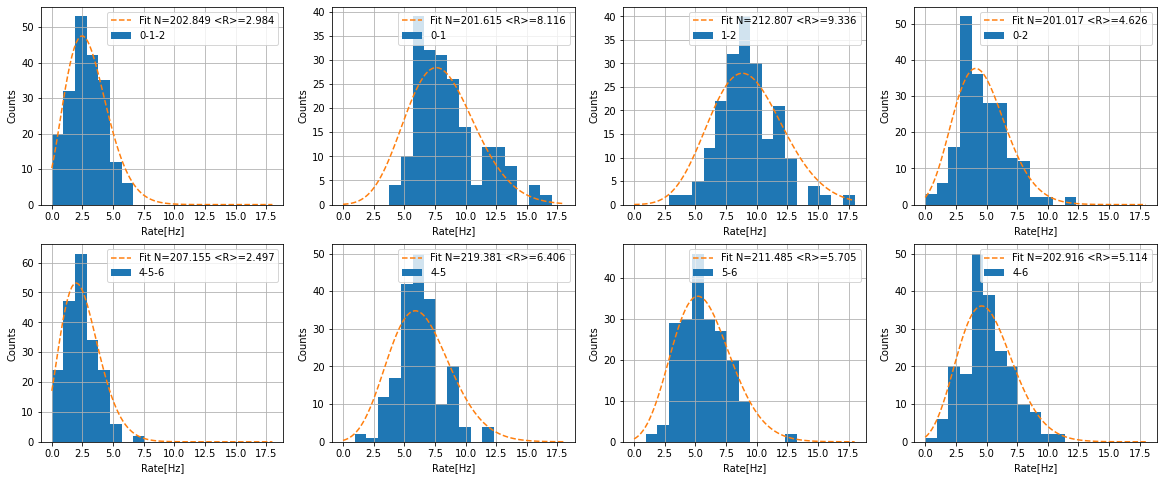





-----------------------------------SCHEDA DESTRA-------------------------------------
-------------------------V=900 V, Threshold=-3 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 19 (low)= 0.325 +/- 0.011 (stat)    0.316 +/- 0.016 (fit)       Compatibilità: 0.463sigma
	eff. detector 7 (high)= 0.248 +/- 0.008 (stat)    0.289 +/- 0.014 (fit)       Compatibilità: 2.498sigma
	eff. detector 20 (middle)= 0.676 +/- 0.027 (stat)    0.586 +/- 0.032 (fit)       Compatibilità: 2.140sigma


----TRIPLETTA N°2-----
	eff. detector 10 (low)= 0.274 +/- 0.009 (stat)    0.361 +/- 0.020 (fit)       Compatibilità: 3.928sigma
	eff. detector 22 (high)= 0.373 +/- 0.013 (stat)    0.408 +/- 0.023 (fit)       Compatibilità: 1.312sigma
	eff. detector 11 (middle)= 0.496 +/- 0.019 (stat)    0.455 +/- 0.026 (fit)       Compatibilità: 1.262sigma




In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/rates_gate_1s_Vth_3mVDx.dat",3,1)

####Δt=2s, Vth=-3mV

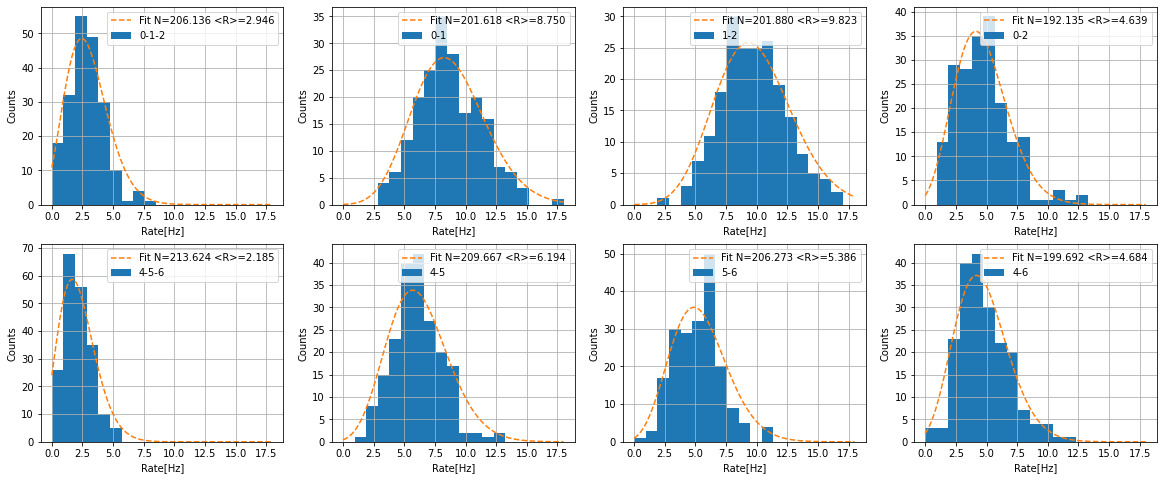





-----------------------------------SCHEDA DESTRA-------------------------------------
-------------------------V=900 V, Threshold=-3 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 19 (low)= 0.282 +/- 0.010 (stat)    0.313 +/- 0.016 (fit)       Compatibilità: 1.682sigma
	eff. detector 7 (high)= 0.255 +/- 0.009 (stat)    0.278 +/- 0.014 (fit)       Compatibilità: 1.419sigma
	eff. detector 20 (middle)= 0.776 +/- 0.037 (stat)    0.576 +/- 0.032 (fit)       Compatibilità: 4.080sigma


----TRIPLETTA N°2-----
	eff. detector 10 (low)= 0.338 +/- 0.011 (stat)    0.324 +/- 0.019 (fit)       Compatibilità: 0.620sigma
	eff. detector 22 (high)= 0.440 +/- 0.015 (stat)    0.382 +/- 0.023 (fit)       Compatibilità: 2.063sigma
	eff. detector 11 (middle)= 0.560 +/- 0.022 (stat)    0.414 +/- 0.025 (fit)       Compatibilità: 4.387sigma




In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/rates_gate_2s_Vth_3mVDx.dat",3,2)

####Δt=1s,Vth=-6mV

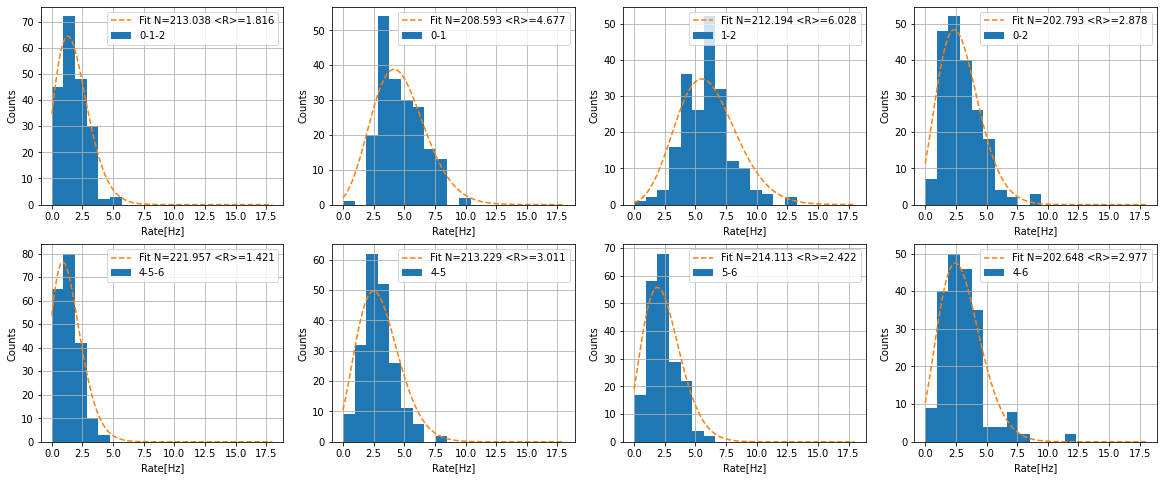





-----------------------------------SCHEDA DESTRA-------------------------------------
-------------------------V=900 V, Threshold=-6 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 19 (low)= 0.342 +/- 0.012 (stat)    0.345 +/- 0.023 (fit)       Compatibilità: 0.112sigma
	eff. detector 7 (high)= 0.284 +/- 0.010 (stat)    0.273 +/- 0.018 (fit)       Compatibilità: 0.538sigma
	eff. detector 20 (middle)= 0.791 +/- 0.038 (stat)    0.567 +/- 0.041 (fit)       Compatibilità: 4.026sigma


----TRIPLETTA N°2-----
	eff. detector 10 (low)= 0.452 +/- 0.018 (stat)    0.441 +/- 0.035 (fit)       Compatibilità: 0.280sigma
	eff. detector 22 (high)= 0.548 +/- 0.022 (stat)    0.564 +/- 0.047 (fit)       Compatibilità: 0.298sigma
	eff. detector 11 (middle)= 0.753 +/- 0.046 (stat)    0.420 +/- 0.033 (fit)       Compatibilità: 5.859sigma




In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/rates_gate_1s_Vth_6mVDx.dat",6,1)

####Δt=2s, Vth=-6mV

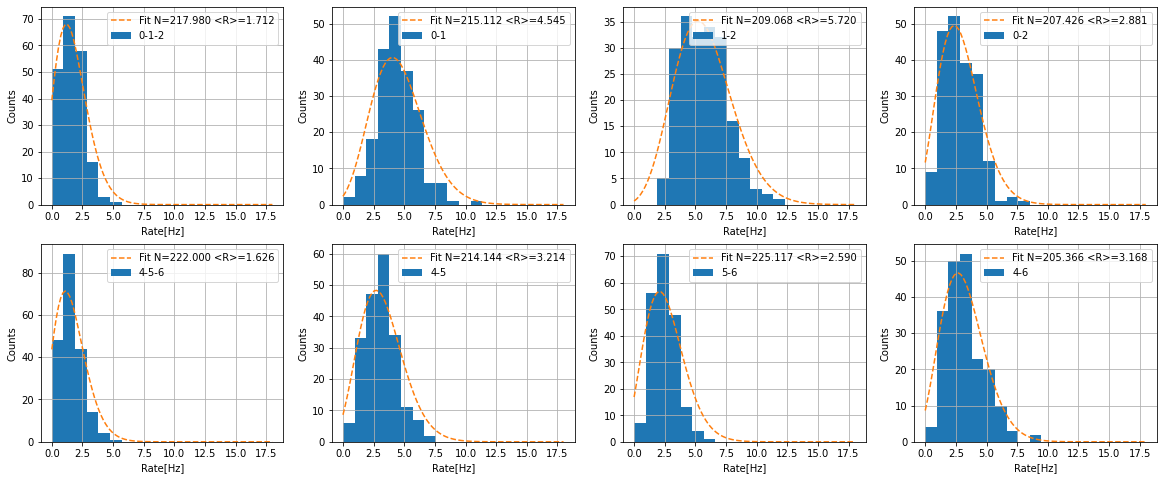





-----------------------------------SCHEDA DESTRA-------------------------------------
-------------------------V=900 V, Threshold=-6 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 19 (low)= 0.353 +/- 0.011 (stat)    0.348 +/- 0.024 (fit)       Compatibilità: 0.185sigma
	eff. detector 7 (high)= 0.283 +/- 0.009 (stat)    0.267 +/- 0.018 (fit)       Compatibilità: 0.788sigma
	eff. detector 20 (middle)= 0.708 +/- 0.028 (stat)    0.561 +/- 0.042 (fit)       Compatibilità: 2.927sigma


----TRIPLETTA N°2-----
	eff. detector 10 (low)= 0.473 +/- 0.017 (stat)    0.471 +/- 0.036 (fit)       Compatibilità: 0.050sigma
	eff. detector 22 (high)= 0.469 +/- 0.016 (stat)    0.613 +/- 0.050 (fit)       Compatibilità: 2.768sigma
	eff. detector 11 (middle)= 0.607 +/- 0.026 (stat)    0.449 +/- 0.034 (fit)       Compatibilità: 3.690sigma




In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/rates_gate_2s_Vth_6mVDx.dat",6,2)

####Δt=16s, Vth=-6mV

####Δt=1s, Vth=-9mV

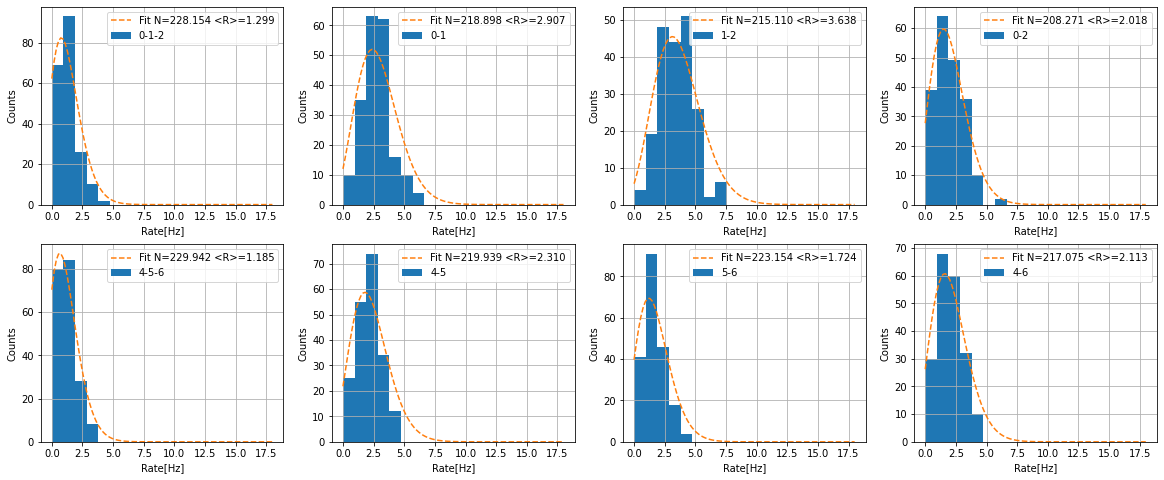





-----------------------------------SCHEDA DESTRA-------------------------------------
-------------------------V=900 V, Threshold=-9 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 19 (low)= 0.418 +/- 0.014 (stat)    0.446 +/- 0.036 (fit)       Compatibilità: 0.720sigma
	eff. detector 7 (high)= 0.334 +/- 0.011 (stat)    0.354 +/- 0.028 (fit)       Compatibilità: 0.671sigma
	eff. detector 20 (middle)= 0.773 +/- 0.034 (stat)    0.632 +/- 0.054 (fit)       Compatibilità: 2.208sigma


----TRIPLETTA N°2-----
	eff. detector 10 (low)= 0.483 +/- 0.016 (stat)    0.509 +/- 0.047 (fit)       Compatibilità: 0.528sigma
	eff. detector 22 (high)= 0.739 +/- 0.027 (stat)    0.686 +/- 0.067 (fit)       Compatibilità: 0.724sigma
	eff. detector 11 (middle)= 0.613 +/- 0.022 (stat)    0.544 +/- 0.051 (fit)       Compatibilità: 1.253sigma




In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/rates_gate_1s_Vth_9mVDx.dat",9,1)

####Δt=2s, Vth=-9mV

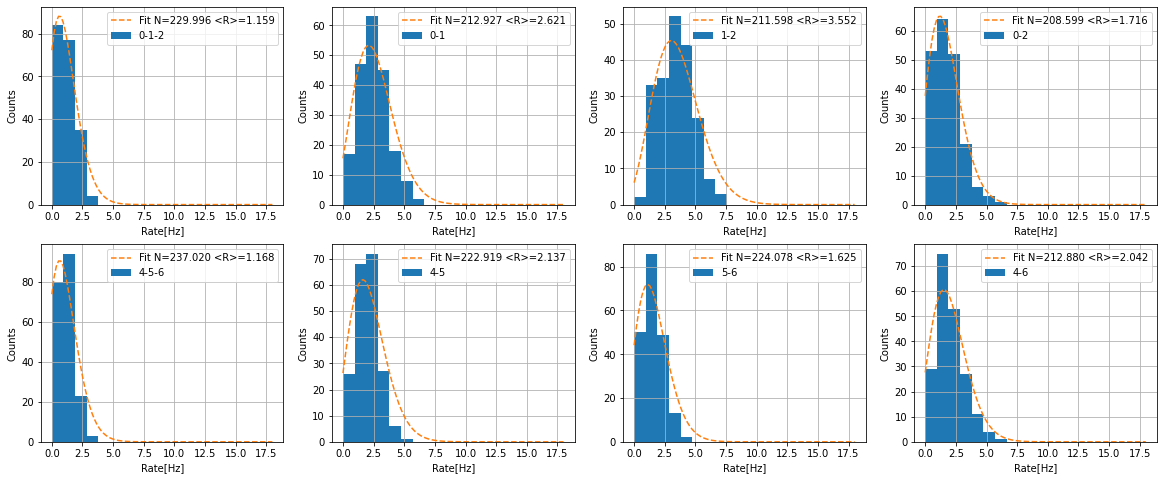





-----------------------------------SCHEDA DESTRA-------------------------------------
-------------------------V=900 V, Threshold=-9 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 19 (low)= 0.464 +/- 0.019 (stat)    0.429 +/- 0.038 (fit)       Compatibilità: 0.825sigma
	eff. detector 7 (high)= 0.341 +/- 0.013 (stat)    0.312 +/- 0.026 (fit)       Compatibilità: 0.988sigma
	eff. detector 20 (middle)= 0.871 +/- 0.047 (stat)    0.624 +/- 0.058 (fit)       Compatibilità: 3.305sigma


----TRIPLETTA N°2-----
	eff. detector 10 (low)= 0.530 +/- 0.016 (stat)    0.518 +/- 0.050 (fit)       Compatibilità: 0.236sigma
	eff. detector 22 (high)= 0.755 +/- 0.025 (stat)    0.700 +/- 0.072 (fit)       Compatibilità: 0.732sigma
	eff. detector 11 (middle)= 0.814 +/- 0.034 (stat)    0.515 +/- 0.049 (fit)       Compatibilità: 4.978sigma




In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/rates_gate_2s_Vth_9mVDx.dat",9,2)

####Δt=1s, Vth=-15mV

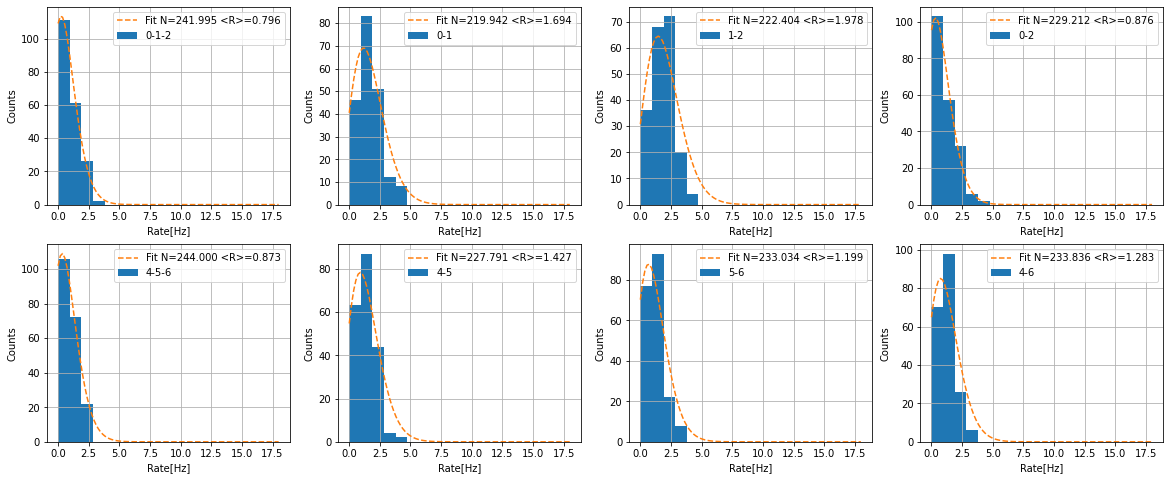





-----------------------------------SCHEDA DESTRA-------------------------------------
-------------------------V=900 V, Threshold=-15 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 19 (low)= 0.562 +/- 0.028 (stat)    0.547 +/- 0.055 (fit)       Compatibilità: 0.243sigma
	eff. detector 7 (high)= 0.407 +/- 0.018 (stat)    0.488 +/- 0.048 (fit)       Compatibilità: 1.564sigma
	eff. detector 20 (middle)= 1.017 +/- 0.065 (stat)    0.826 +/- 0.085 (fit)       Compatibilità: 1.786sigma


----TRIPLETTA N°2-----
	eff. detector 10 (low)= 0.719 +/- 0.025 (stat)    0.687 +/- 0.074 (fit)       Compatibilità: 0.417sigma
	eff. detector 22 (high)= 0.867 +/- 0.032 (stat)    0.781 +/- 0.085 (fit)       Compatibilità: 0.947sigma
	eff. detector 11 (middle)= 0.781 +/- 0.027 (stat)    0.750 +/- 0.082 (fit)       Compatibilità: 0.359sigma




In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/rates_gate_1s_Vth_15mVDx.dat",15,1)

####Δt=2s, Vth=-15mV

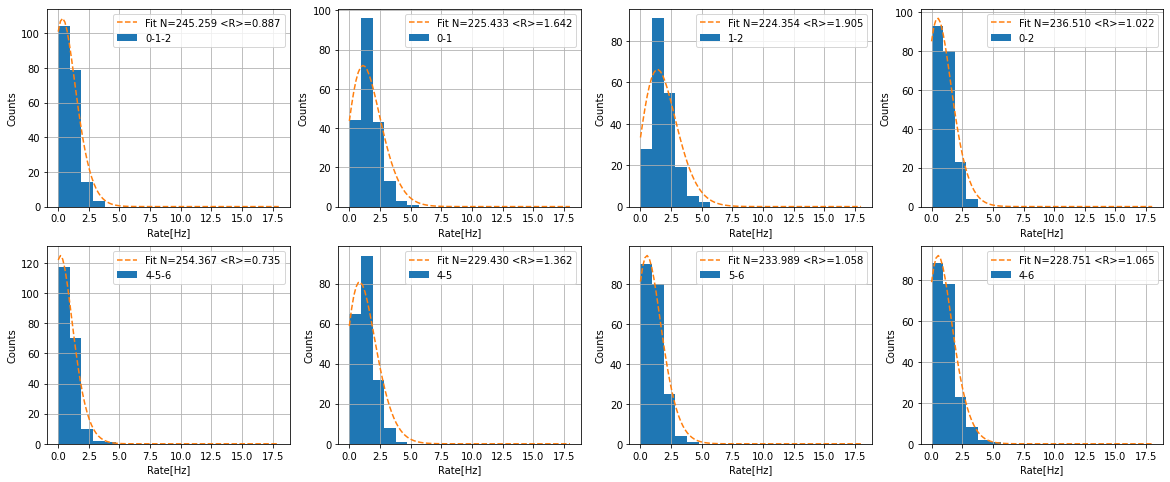





-----------------------------------SCHEDA DESTRA-------------------------------------
-------------------------V=900 V, Threshold=-15 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 19 (low)= 0.531 +/- 0.026 (stat)    0.564 +/- 0.060 (fit)       Compatibilità: 0.506sigma
	eff. detector 7 (high)= 0.401 +/- 0.019 (stat)    0.472 +/- 0.049 (fit)       Compatibilità: 1.362sigma
	eff. detector 20 (middle)= 0.903 +/- 0.052 (stat)    0.859 +/- 0.099 (fit)       Compatibilità: 0.394sigma


----TRIPLETTA N°2-----
	eff. detector 10 (low)= 0.502 +/- 0.024 (stat)    0.602 +/- 0.067 (fit)       Compatibilità: 1.399sigma
	eff. detector 22 (high)= 0.702 +/- 0.038 (stat)    0.721 +/- 0.082 (fit)       Compatibilità: 0.216sigma
	eff. detector 11 (middle)= 0.915 +/- 0.061 (stat)    0.702 +/- 0.079 (fit)       Compatibilità: 2.136sigma




In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/rates_gate_2s_Vth_15mVDx.dat",15,2)

####Δt=1s, Vth=-20mV

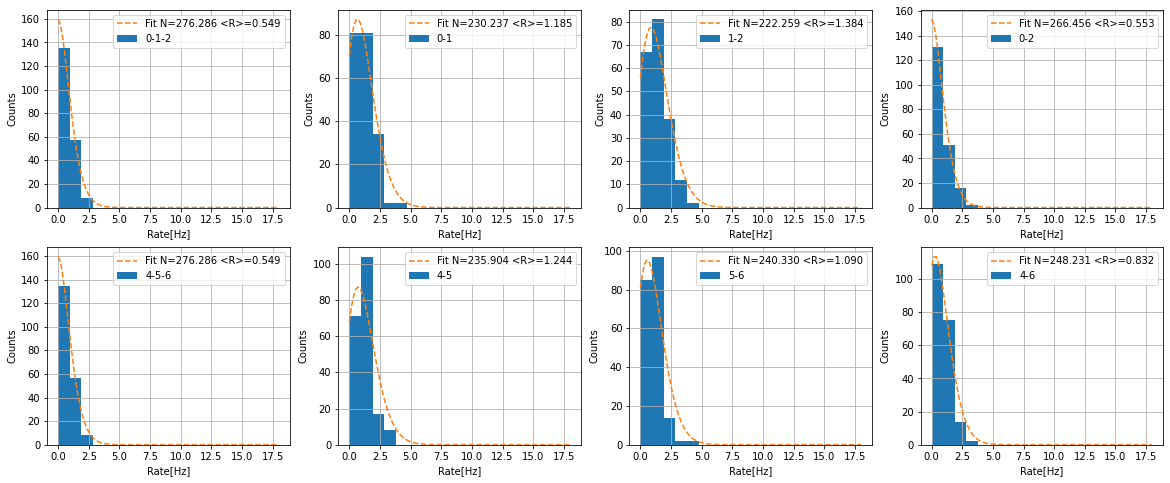





-----------------------------------SCHEDA DESTRA-------------------------------------
-------------------------V=900 V, Threshold=-20 mV, dt=1 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 19 (low)= 0.569 +/- 0.022 (stat)    0.580 +/- 0.063 (fit)       Compatibilità: 0.163sigma
	eff. detector 7 (high)= 0.591 +/- 0.025 (stat)    0.499 +/- 0.053 (fit)       Compatibilità: 1.576sigma
	eff. detector 20 (middle)= 1.148 +/- 0.064 (stat)    0.854 +/- 0.094 (fit)       Compatibilità: 2.598sigma


----TRIPLETTA N°2-----
	eff. detector 10 (low)= 0.532 +/- 0.022 (stat)    0.571 +/- 0.067 (fit)       Compatibilità: 0.552sigma
	eff. detector 22 (high)= 0.684 +/- 0.031 (stat)    0.634 +/- 0.076 (fit)       Compatibilità: 0.618sigma
	eff. detector 11 (middle)= 0.912 +/- 0.046 (stat)    0.790 +/- 0.098 (fit)       Compatibilità: 1.131sigma




In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/rates_gate_1s_Vth_20mVDx.dat",20,1)

####Δt=2s, Vth=-20mV

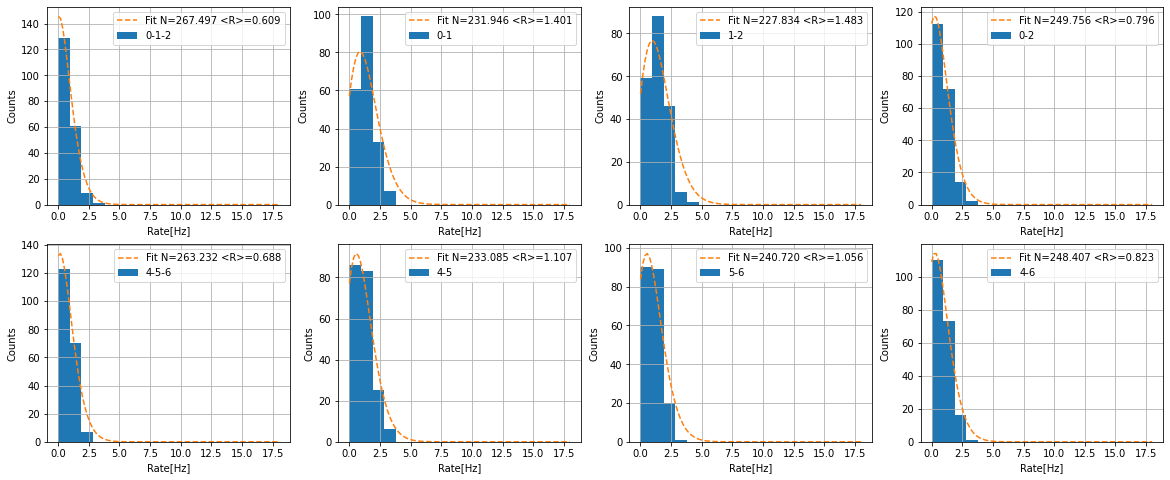





-----------------------------------SCHEDA DESTRA-------------------------------------
-------------------------V=900 V, Threshold=-20 mV, dt=2 s----------------------------
----TRIPLETTA N°1-----
	eff. detector 19 (low)= 0.472 +/- 0.019 (stat)    0.573 +/- 0.063 (fit)       Compatibilità: 1.522sigma
	eff. detector 7 (high)= 0.497 +/- 0.021 (stat)    0.523 +/- 0.056 (fit)       Compatibilità: 0.441sigma
	eff. detector 20 (middle)= 0.907 +/- 0.046 (stat)    0.876 +/- 0.103 (fit)       Compatibilità: 0.274sigma


----TRIPLETTA N°2-----
	eff. detector 10 (low)= 0.697 +/- 0.030 (stat)    0.632 +/- 0.076 (fit)       Compatibilità: 0.794sigma
	eff. detector 22 (high)= 0.678 +/- 0.027 (stat)    0.712 +/- 0.089 (fit)       Compatibilità: 0.361sigma
	eff. detector 11 (middle)= 0.972 +/- 0.047 (stat)    0.835 +/- 0.106 (fit)       Compatibilità: 1.180sigma




In [ ]:
analysis_rate("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/rates_gate_2s_Vth_20mVDx.dat",20,2)

# Efficienza

In [92]:
def efficienza(data,th,ntripletta):
  
  j=0
  k=0
  eff=0
  err=0

  for i in range(0+3*(ntripletta-1),len(data.columns),12):
      if(np.min(data[i])<th and np.min(data[i+1])<th):
        j=j+1
        if(np.min(data[i+2])<th):
          k=k+1
  if(j==0):
    eff=0
  else:
    eff=k/j
  err=np.sqrt((eff*(1-eff))/(j))

  print('Efficienza del PMT della tripletta {:d} a V=900V con treshold={:.3f}V e {:d} eventi pari a \u03B5={:.3f}+/-{:.3f}'.format(ntripletta,th,j,eff,err))

## Presa dati 31/03

### Scheda sinistra (senza telo, forse da scartare)

#### PMT down

In [ ]:
th=[-0.003,-0.006,-0.009,-0.015,-0.020]

print("-----------TRIPLETTA 1----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_down.dat",th[i],1)

print("-----------TRIPLETTA 2----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_down.dat",th[i],2)

print("-----------TRIPLETTA 3----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_down.dat",th[i],3)

print("-----------TRIPLETTA 4----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_down.dat",th[i],4)

-----------TRIPLETTA 1----------
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.003V e 435 eventi pari a ε=0.936+/-0.012
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.006V e 435 eventi pari a ε=0.883+/-0.015
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.009V e 435 eventi pari a ε=0.791+/-0.020
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.015V e 435 eventi pari a ε=0.687+/-0.022
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.020V e 435 eventi pari a ε=0.651+/-0.023
-----------TRIPLETTA 2----------
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.003V e 519 eventi pari a ε=0.906+/-0.013
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.006V e 519 eventi pari a ε=0.811+/-0.017
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.009V e 519 eventi pari a ε=0.696+/-0.020
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.015V e 519 eventi pari a ε=0.593+/-0.022
Efficie

#### PMT middle

In [ ]:
th=[-0.003,-0.006,-0.009,-0.015,-0.020]

print("-----------TRIPLETTA 1----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_middle.dat",th[i],1)

print("-----------TRIPLETTA 2----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_middle.dat",th[i],2)

print("-----------TRIPLETTA 3----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_middle.dat",th[i],3)

print("-----------TRIPLETTA 4----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_middle.dat",th[i],4)

-----------TRIPLETTA 1----------
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.003V e 500 eventi pari a ε=1.000+/-0.000
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.006V e 500 eventi pari a ε=0.992+/-0.004
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.009V e 500 eventi pari a ε=0.990+/-0.004
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.015V e 500 eventi pari a ε=0.972+/-0.007
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.020V e 500 eventi pari a ε=0.944+/-0.010
-----------TRIPLETTA 2----------
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.003V e 475 eventi pari a ε=0.996+/-0.003
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.006V e 475 eventi pari a ε=0.996+/-0.003
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.009V e 475 eventi pari a ε=0.994+/-0.004
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.015V e 475 eventi pari a ε=0.987+/-0.005
Efficie

#### PMT top

In [ ]:
th=[-0.003,-0.006,-0.009,-0.015,-0.020]

print("-----------TRIPLETTA 1----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_top.dat",th[i],1)

print("-----------TRIPLETTA 2----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_top.dat",th[i],2)

print("-----------TRIPLETTA 3----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_top.dat",th[i],3)

print("-----------TRIPLETTA 4----------")
for i in range(len(th)):
  efficienza("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_top.dat",th[i],4)

-----------TRIPLETTA 1----------
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.003V e 374 eventi pari a ε=0.925+/-0.014
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.006V e 374 eventi pari a ε=0.896+/-0.016
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.009V e 374 eventi pari a ε=0.845+/-0.019
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.015V e 374 eventi pari a ε=0.741+/-0.023
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.020V e 374 eventi pari a ε=0.706+/-0.024
-----------TRIPLETTA 2----------
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.003V e 559 eventi pari a ε=0.902+/-0.013
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.006V e 559 eventi pari a ε=0.818+/-0.016
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.009V e 559 eventi pari a ε=0.737+/-0.019
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.015V e 559 eventi pari a ε=0.610+/-0.021
Efficie

###Scheda destra (con telo)

####PMT down

In [93]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/Coincidenza_downDx.dat")
data=data.transpose()
th=[-0.003,-0.006,-0.009,-0.015,-0.020,-0.030,-0.040,-0.050]

print("-----------TRIPLETTA 1----------")
for i in range(len(th)):
  efficienza(data,th[i],1)

print("-----------TRIPLETTA 2----------")
for i in range(len(th)):
  efficienza(data,th[i],2)

-----------TRIPLETTA 1----------
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.003V e 272 eventi pari a ε=0.875+/-0.020
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.006V e 271 eventi pari a ε=0.838+/-0.022
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.009V e 271 eventi pari a ε=0.812+/-0.024
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.015V e 271 eventi pari a ε=0.764+/-0.026
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.020V e 271 eventi pari a ε=0.690+/-0.028
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.030V e 263 eventi pari a ε=0.548+/-0.031
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.040V e 229 eventi pari a ε=0.528+/-0.033
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.050V e 204 eventi pari a ε=0.529+/-0.035
-----------TRIPLETTA 2----------
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.003V e 238 eventi pari a ε=0.924+/-0.017
Efficie

####PMT middle

In [94]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/Coincidenza_middleDx.dat")
data=data.transpose()
th=[-0.003,-0.006,-0.009,-0.015,-0.020,-0.030,-0.040,-0.050]


print("-----------TRIPLETTA 1----------")
for i in range(len(th)):
  efficienza(data,th[i],1)

print("-----------TRIPLETTA 2----------")
for i in range(len(th)):
  efficienza(data,th[i],2)

-----------TRIPLETTA 1----------
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.003V e 268 eventi pari a ε=0.974+/-0.010
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.006V e 264 eventi pari a ε=0.985+/-0.008
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.009V e 264 eventi pari a ε=0.985+/-0.008
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.015V e 262 eventi pari a ε=0.973+/-0.010
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.020V e 262 eventi pari a ε=0.966+/-0.011
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.030V e 256 eventi pari a ε=0.957+/-0.013
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.040V e 222 eventi pari a ε=0.968+/-0.012
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.050V e 201 eventi pari a ε=0.975+/-0.011
-----------TRIPLETTA 2----------
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.003V e 241 eventi pari a ε=0.946+/-0.015
Efficie

####PMT top

In [95]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/Coincidenza_topDx.dat")
data=data.transpose()
th=[-0.003,-0.006,-0.009,-0.015,-0.020,-0.030,-0.040,-0.050]

print("-----------TRIPLETTA 1----------")
for i in range(len(th)):
  efficienza(data,th[i],1)

print("-----------TRIPLETTA 2----------")
for i in range(len(th)):
  efficienza(data,th[i],2)

-----------TRIPLETTA 1----------
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.003V e 298 eventi pari a ε=0.849+/-0.021
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.006V e 294 eventi pari a ε=0.786+/-0.024
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.009V e 294 eventi pari a ε=0.745+/-0.025
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.015V e 294 eventi pari a ε=0.622+/-0.028
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.020V e 294 eventi pari a ε=0.595+/-0.029
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.030V e 285 eventi pari a ε=0.537+/-0.030
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.040V e 240 eventi pari a ε=0.554+/-0.032
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.050V e 213 eventi pari a ε=0.559+/-0.034
-----------TRIPLETTA 2----------
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.003V e 217 eventi pari a ε=0.862+/-0.023
Efficie

## Presa dati 06/04 (con telo)

### PMT down

In [96]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/Coincidenza_DownSx.dat")
data=data.transpose()
th=[-0.003,-0.006,-0.009,-0.015,-0.020,-0.030,-0.040,-0.050]

print("-----------TRIPLETTA 1----------")
for i in range(len(th)):
  efficienza(data,th[i],1)

print("-----------TRIPLETTA 2----------")
for i in range(len(th)):
  efficienza(data,th[i],2)

print("-----------TRIPLETTA 3----------")
for i in range(len(th)):
  efficienza(data,th[i],3)

print("-----------TRIPLETTA 4----------")
for i in range(len(th)):
  efficienza(data,th[i],4)

-----------TRIPLETTA 1----------
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.003V e 589 eventi pari a ε=0.800+/-0.016
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.006V e 452 eventi pari a ε=0.874+/-0.016
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.009V e 442 eventi pari a ε=0.812+/-0.019
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.015V e 438 eventi pari a ε=0.719+/-0.021
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.020V e 436 eventi pari a ε=0.688+/-0.022
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.030V e 389 eventi pari a ε=0.620+/-0.025
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.040V e 296 eventi pari a ε=0.595+/-0.029
Efficienza del PMT della tripletta 1 a V=900V con treshold=-0.050V e 226 eventi pari a ε=0.571+/-0.033
-----------TRIPLETTA 2----------
Efficienza del PMT della tripletta 2 a V=900V con treshold=-0.003V e 938 eventi pari a ε=0.660+/-0.015
Efficie

## Stima intervallo temporale

In [99]:
def times(data,n_tripletta):
  t_up=[]
  t_middle=[]
  t_down=[]
  for i in range(3*(n_tripletta-1),len(data.columns),12):
    picco_up=np.min(data[i])
    picco_middle=np.min(data[i+1])
    picco_down=np.min(data[i+2])
    
    if(picco_up<-0.020 and picco_middle<-0.020):
      k_u=0
      k_m=0
      for j in range(len(data.index)):
        if(data[i][j]<0.3*picco_up and k_u==0):
          t_up.append(((j+(j-1))/2))
          k_u=1
        if(data[i+1][j]<0.3*picco_middle and k_m==0):
          t_middle.append(((j+(j-1))/2))  
          k_m=1
    
    if(picco_up<-0.020 and picco_middle<-0.020 and picco_down<-0.020):
      k_d=0
      for j in range(len(data.index)):
        if(data[i+2][j]<0.3*picco_down and k_d==0):
          t_down.append(((j+(j-1))/2))
          k_d=1

  t_mean=[((x+y)/2) for x,y in zip(t_up,t_middle)]
  dt_down=[np.abs((x-y))*0.3125 for x,y in zip(t_mean,t_down)]        
  dt_um=[np.abs((x-y))*0.3125 for x,y in zip(t_up,t_middle)]
  return(dt_um,dt_down)

In [100]:
def flatten(t):
    return [item for sublist in t for item in sublist]

### PMT down

In [97]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/Coincidenza_DownSx.dat")
data=data.transpose()

In [101]:
dt_um=[]
dt_down=[]
for i in range(1,5):
  dt1,dt2=times(data,i)
  dt_um.append(dt1)
  dt_down.append(dt2)
dt_um=flatten(dt_um)
dt_down=flatten(dt_down)

In [108]:
dt_down.remove(np.max(dt_down))

In [112]:
dt_um.remove(np.max(dt_um))

In [113]:
np.max(dt_um)

7.8125

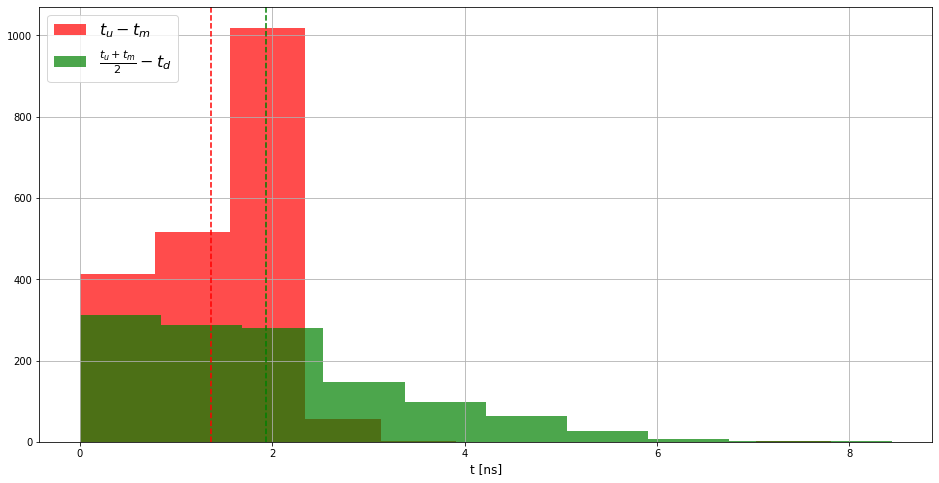

In [114]:
plt.figure(figsize=(16,8))
plt.grid()
#plt.xlim(0,10)

plt.hist(dt_um,label=r'$t_u-t_m$',color='red',alpha=0.7)
plt.axvline(np.mean(dt_um),color='red',linestyle='--')
plt.hist(dt_down,label=r'$\frac{t_u+t_m}{2}-t_d$',color='green',alpha=0.7)
plt.axvline(np.mean(dt_down),color='green',linestyle='--')

plt.xlabel('t [ns]',size=12)
plt.legend(loc=2,prop={'size':16})

### PMT middle

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_middle.dat")
data=data.transpose()

In [ ]:
dt_ud=[]
dt_middle=[]
for i in range(1,5):
  dt1,dt2=times(data,i)
  dt_ud.append(dt1)
  dt_middle.append(dt2)
dt_ud=flatten(dt_ud)
dt_middle=flatten(dt_middle)

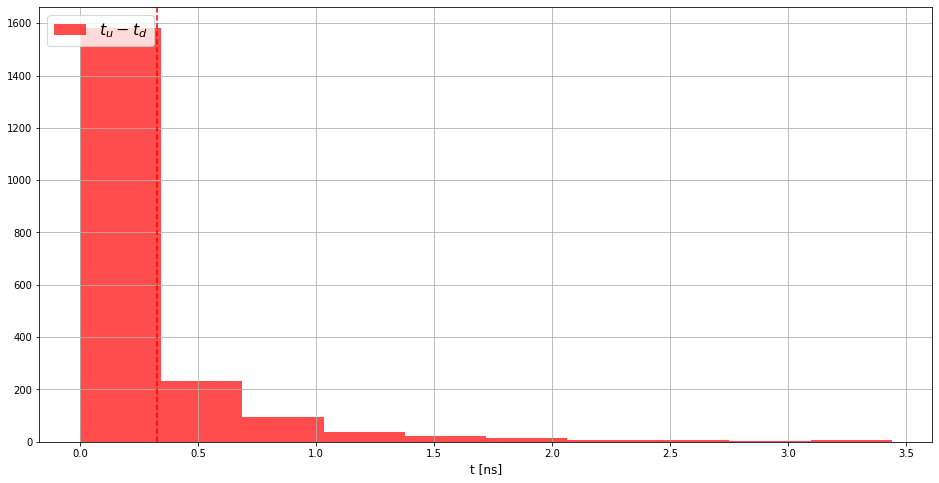

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()

plt.hist(dt_ud,label=r'$t_u-t_d$',color='red',alpha=0.7)
plt.axvline(np.mean(dt_ud),color='red',linestyle='--')
#plt.hist(dt_middle,label=r'$\frac{t_u+t_d}{2}-t_m$',color='green',alpha=0.7)
#plt.axvline(np.mean(dt_middle),color='green',linestyle='--')

plt.xlabel('t [ns]',size=12)
plt.legend(loc=2,prop={'size':16})

### PMT up

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 31 03/Coincidenza_top.dat")
data=data.transpose()

In [ ]:
dt_md=[]
dt_up=[]
for i in range(1,5):
  dt1,dt2=times(data,i)
  dt_md.append(dt1)
  dt_up.append(dt2)
dt_md=flatten(dt_md)
dt_up=flatten(dt_up)

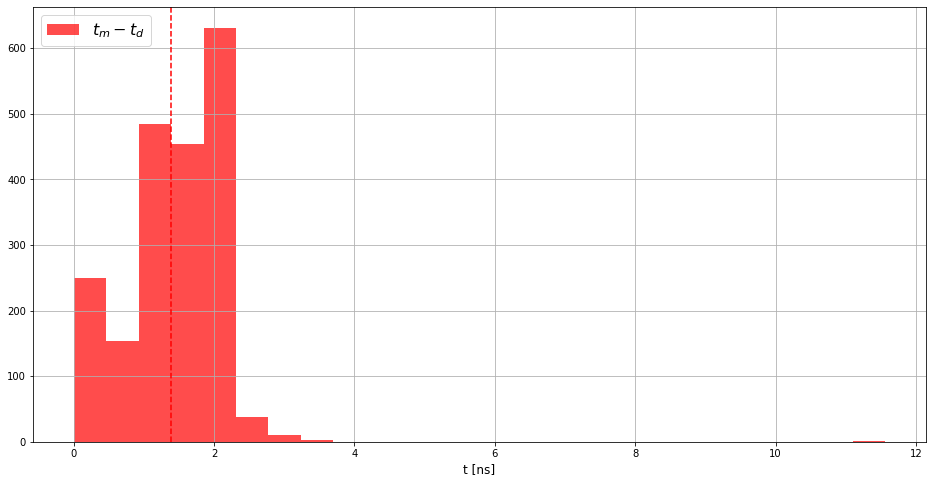

In [ ]:
plt.figure(figsize=(16,8))
plt.grid()

plt.hist(dt_md,bins=25,label=r'$t_m-t_d$',color='red',alpha=0.7)
plt.axvline(np.mean(dt_md),color='red',linestyle='--')
#plt.hist(dt_up,label=r'$\frac{t_m+t_d}{2}-t_u$',color='green',alpha=0.7)
#plt.axvline(np.mean(dt_up),color='green',linestyle='--')

plt.xlabel('t [ns]',size=12)
plt.legend(loc=2,prop={'size':16})

In [ ]:
for i in range(0,len(data.columns),3):
  if(np.min(data[i])<-0.020 and np.min(data[i+1])<-0.020 and np.min(data[i+2])<-0.020):
    print(i)

30
72
99
111
123
141
168
186
210
219
234
255
273
306
333
345
354
396
426
441
522
555
573
579
597
615
633
636
648
663
678
702
714
735
771
780
801
813
822
864
882
900
933
948
1002
1038
1053
1056
1068
1083
1104
1116
1131
1149
1158
1197
1218
1248
1290
1305
1323
1335
1347
1383
1404
1419
1449
1455
1467
1485
1491
1500
1518
1539
1581
1605
1611
1620
1647
1662
1686
1695
1722
1743
1752
1764
1785
1794
1809
1821
1827
1857
1863
1881
1884
1896
1914
1926
1938
1953
1962
1998
2013
2016
2034
2085
2100
2124
2151
2160
2175
2196
2229
2235
2244
2256
2292
2325
2328
2349
2391
2394
2403
2433
2454
2466
2472
2496
2508
2523
2538
2571
2598
2607
2631
2661
2679
2706
2739
2769
2772
2784
2796
2859
2874
2889
2907
2919
2928
2955
2973
2976
2994
3012
3027
3045
3087
3123
3144
3180
3195
3243
3258
3285
3291
3303
3324
3357
3360
3399
3423
3441
3489
3501
3510
3543
3552
3570
3585
3591
3615
3627
3645
3651
3690
3708
3726
3732
3765
3771
3804
3840
3882
3900
3921
3969
3984
3996
4017
4029
4068
4125
4134
4140
4152
4182
4194
4209
4221
42

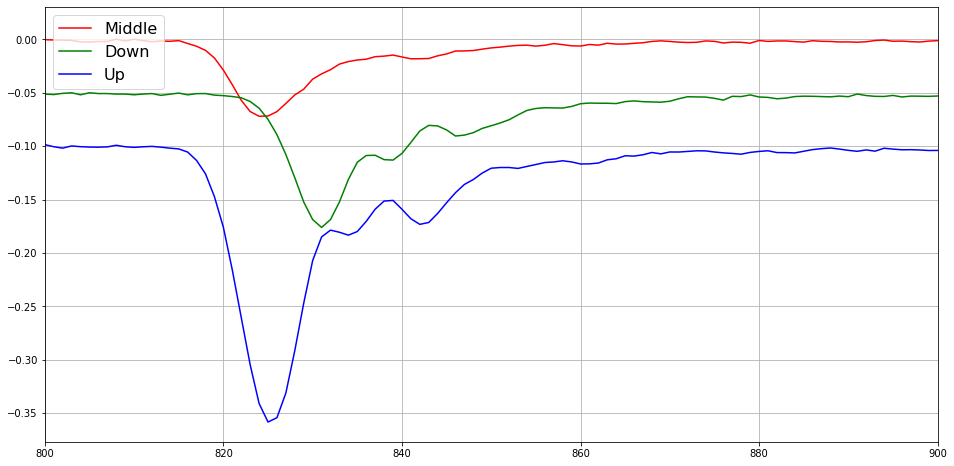

In [ ]:
x=np.arange(0,1024,1)

plt.figure(figsize=(16,8))
plt.grid()
plt.xlim(800,900)
plt.plot(x,data[23958].values,color='red',label='Middle')
plt.plot(x,data[23959].values-0.05,color='green',label='Down')
plt.plot(x,data[23960].values-0.10,color='blue',label='Up')
plt.legend(loc=2,prop={'size':16})

# Grafici rate (visualizzazione più comoda)

In [ ]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 24 03/rates_4.dat")
labels=['0-1-2','0-1','1-2','0-2','4-5-6','4-5','5-6','4-6','8-9-10','8-9','9-10','8-10','12-13-14','12-13','13-14','12-14']
data.columns=[labels[i] for i in range(len(labels))]

In [ ]:
from scipy.special import factorial

def Poisson(x,N,alpha):
  return np.array(N*alpha**x*m.exp(-alpha)/factorial(x))

mean_rates = np.mean(data[labels])
x = np.linspace(0,18, 100)
max_rates = np.amax(data, axis=0)
min_rates = np.amin(data, axis=0)
err_rates = []
new_mean_rates = []
k=0

fig,axes=plt.subplots(4,4,sharey=False,figsize=(20,16))

for i in range(0,4):
  for j in range(0,4):
    binned_rates, bins, _ = axes[i,j].hist(data[labels[j+k]], bins=19, range=(0, 18), label=labels[j+k])
    axes[i,j].set_xlabel('Rate[Hz]')
    axes[i,j].set_ylabel('Counts')
    axes[i,j].grid()

    centered_bins = np.array([ (bins[p]+bins[p+1])/2  for p in range(0, bins.size-1)])
    fit_pars, cov_matrix = fit(Poisson, centered_bins, binned_rates, p0=[data[labels[j+k]].size, mean_rates[labels[j+k]]])
    axes[i,j].plot(x, Poisson(x, fit_pars[0], fit_pars[1]), '--', label="Fit N={:.3f} <R>={:.3f}".format(fit_pars[0], fit_pars[1]))
    axes[i,j].legend(loc=4)

    new_mean_rates.append(fit_pars[1])
    err_rates.append(np.sqrt(fit_pars[1]/data[labels[i]].size))

  k=k+4

plt.show()
plt.close()
  

#Monte Carlo per fattore geometrico

In [ ]:
from scipy.stats import describe

def generator(n_points):
  x = np.cos(0.5*m.pi*np.random.uniform(size=(n_points,1)))**2*np.random.choice([1,-1])
  y = np.cos(0.5*m.pi*np.random.uniform(size=(n_points,1)))**2*np.random.choice([1-1])
  z = np.random.uniform(size=(n_points,1))
  points = np.array([[30*x[i], 30*y[i], -30+60*z[i]] for i in range(n_points)])
  points.flatten()
  return points

def segment(x,start, end):
  return np.array([start[0]+(end-start)[0]*x, start[1]+(end-start)[1]*x, start[2]+(end-start)[2]*x])

def conditions(x,x_min,x_max):
  test = [(x_min<x[i]<x_max) for i in range(x.size)]
  if np.any(test):
    return True
  else:
    return False

def draw(x):
  index = np.arange(n_points)
  extr = np.random.choice(index, 2, replace=False)
  return np.array([x[extr[0]], x[extr[1]]])

def check_trajectory(x, start, end):
  rays = segment(x, start, end)
  C_up=0
  C_middle=0
  C_down=0
  C_up_down=0
  C_middle_down=0
  C_middle_up=0
  C_all=0
  counts = []
  for j in range(x.size):
    check_x = -1.25 < rays[0][j] < 1.25
    check_y = -14.65 < rays[1][j] < 14.65
    check_z = -3.75 < rays[2][j] < 3.75
    if np.any(check_x, where=True):
      if np.any(check_y, where=True):
        if np.any(check_z, where=True):
          if conditions(rays[2], -3.75, -1.25): #barra inferiore
            C_down = C_down + 1
            if conditions(rays[2], -1.25, 1.25):
              C_middle_down = C_middle_down + 1
              if conditions(rays[2], 1.25, 3.75):
                C_all = C_all + 1
          if conditions(rays[2], -1.25, 1.25): #barra intermedia
            C_middle = C_middle + 1 
            if conditions(rays[2], 1.25, 3.75):
              C_middle_up =C_middle_up + 1
          if conditions(rays[2], 1.25, 3.75): #barra superiore
            C_up = C_up +1
            if conditions(rays[2], -3.75, -1.25):
              C_up_down = C_up_down + 1
  counts.append([C_up, C_middle, C_down, C_middle_down, C_middle_up, C_up_down, C_all])
  return counts

n_points = 100000
points=generator(n_points)
x = np.linspace(0,1,100)
counts = []
rep = []

In [ ]:
n_rep=20
n_tracks=100000
for j in range(0,n_rep):
  for i in range(n_tracks):
    in_end_tracks = draw(points)
    x_start = in_end_tracks[0]
    x_stop = in_end_tracks[1]
    counts.append(check_trajectory(x, x_start, x_stop))
  sum_counts=np.sum(np.array(counts), axis=0).flatten()
  rep.append(sum_counts)
  print("Run n°{:} ended".format(j+1))

NameError: ignored

In [ ]:
def pairs(a,b):
  line = []
  for i in range(a.size):
    line.append([a[i],b[i]])
  return np.array(line).flatten()

stats = describe(rep)
mean_counts = stats[2]
std_counts = np.sqrt(stats[3]/stats[0])

c_err_up = np.sqrt((mean_counts[3]*std_counts[6]/mean_counts[6]**2)**2 + (std_counts[3]/mean_counts[6])**2)
c_err_middle =np.sqrt((mean_counts[5]*std_counts[6]/mean_counts[6]**2)**2 + (std_counts[5]/mean_counts[6])**2)
c_err_down = np.sqrt((mean_counts[4]*std_counts[6]/mean_counts[6]**2)**2 + (std_counts[4]/mean_counts[6])**2)



lines = np.array([ pairs(mean_counts, std_counts) for i in range(stats[0])])
lines.flatten()
np.savetxt("/content/drive/MyDrive/SmartAbs 2022/Simulazione fattore geometrico/valori_medi_conteggi_{}rip_{}punti.dat".format(n_rep, n_tracks), lines)

In [ ]:
print("Fattore di correzione barra superiore: Corr_up = {:.3f} +/- {:.3f}".format(mean_counts[3]/mean_counts[6], c_err_up))
print("Fattore di correzione barra interemedia: Corr_middle = {:.3f} +/- {:.3f}".format(mean_counts[5]/mean_counts[6], c_err_middle))
print("Fattore di correzione barra inferiore: Corr_down = {:.3f} +/- {:.3f}".format(mean_counts[4]/mean_counts[6], c_err_down))

Fattore di correzione barra superiore: Corr_up = 1.149 +/- 0.093
Fattore di correzione barra interemedia: Corr_middle = 1.000 +/- 0.081
Fattore di correzione barra inferiore: Corr_down = 1.157 +/- 0.094


#Plot waveform

In [164]:
data=leggi_file("/content/drive/MyDrive/SmartAbs 2022/Misure 04 04/Coincidenza_DownSx.dat")
data=data.transpose()

In [169]:
picco_up=[]
picco_middle=[]
picco_down=[]

for i in range(0,len(data.columns),3):
  if(np.min(data[i])<-0.020 and np.min(data[i+1])<-0.020):
    picco_up.append(np.min(data[i]))
    picco_middle.append(np.min(data[i+1]))
  if(np.min(data[i+2])<-0.020):
    picco_down.append(np.min(data[i+2]))

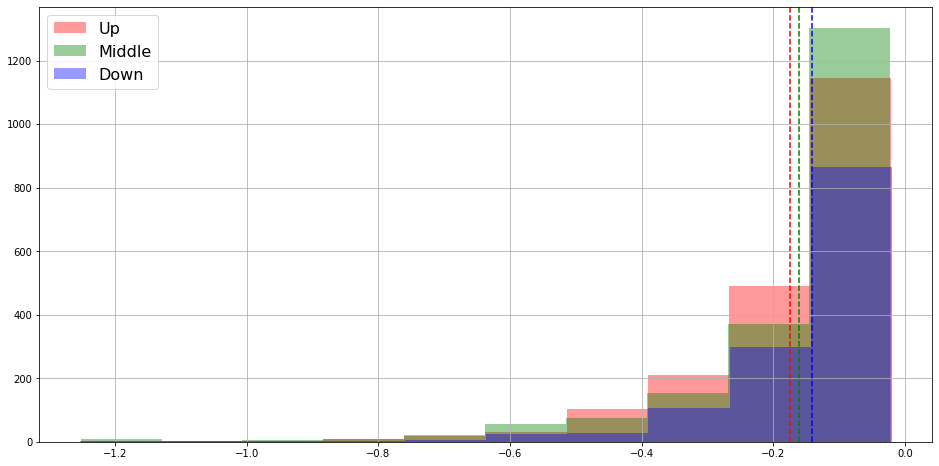

In [176]:
plt.figure(figsize=(16,8))
plt.grid()

plt.hist(picco_up,color='red',alpha=0.4,label='Up')
plt.hist(picco_middle,color='green',alpha=0.4,label='Middle')
plt.hist(picco_down,color='blue',alpha=0.4,label='Down')

plt.axvline(x=np.mean(picco_up),linestyle='--',color='red')
plt.axvline(x=np.mean(picco_middle),linestyle='--',color='green')
plt.axvline(x=np.mean(picco_down),linestyle='--',color='blue')
plt.legend(loc=2,prop={'size':16})

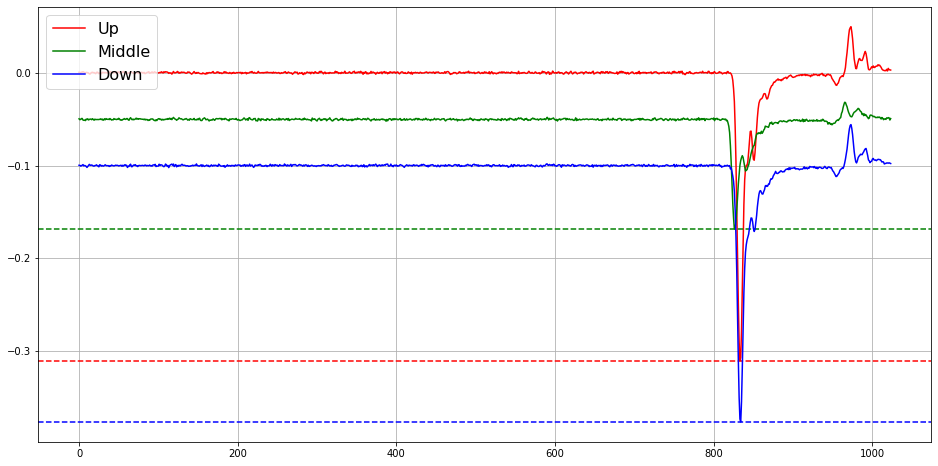

In [140]:
x=np.arange(0,1024,1)

plt.figure(figsize=(16,8))
plt.grid()

plt.plot(x,data[0].values,color='red',label='Up')
plt.axhline(y=np.min(data[0]),color='red',linestyle='--')

plt.plot(x,data[1].values-0.05,color='green',label='Middle')
plt.axhline(y=np.min(data[1])-0.05,color='green',linestyle='--')

plt.plot(x,data[2].values-0.10,color='blue',label='Down')
plt.axhline(y=np.min(data[2])-0.10,color='blue',linestyle='--')

plt.legend(loc=2,prop={'size':16})